# Accessing AWS S3 Buckets from the command line

## Short tutorial on awscli
- install on ubuntu with apt-get install awscli
- can also install with python
- library environment can get pootched

In [1]:
!aws s3 ls --help


Unknown options: --help


In [2]:
# Tony should add groff to the container

In [3]:
! aws s3 help


Could not find executable named "groff"


# Simple ls command

### shows all the buckets in my account - BUT not foreign buckets

In [4]:
! aws s3 ls

2019-12-11 15:52:24 aws-athena-query-results-574826924367-us-west-2
2020-02-11 16:15:38 cd-dev-usgs-eros-sat-api-stagingbucket-1u456p5bmzw7r
2020-02-12 22:17:35 cd-it-usgs-eros-sat-api-stagingbucket-o97vg0hu4ey0
2017-10-11 13:15:51 cf-dev-lsdsdpas
2018-01-08 22:14:15 cf-templates-840xf4hobwk0-us-west-2
2018-09-17 22:15:10 csr-adminbucket-574826924367
2019-03-29 15:57:53 dev-cmahan-test
2019-04-16 18:51:47 dev-dilley
2018-02-27 17:14:07 dev-jhedman
2019-07-02 19:27:50 dev-jjfrench
2019-08-23 18:11:49 dev-jpitotdelabeaujar-catalog-test
2020-01-07 22:36:10 dev-landsatlook.dev-lsdsdpas.chs.usgs.gov
2017-11-21 18:08:58 dev-orm
2019-12-03 16:02:23 dev-rhassan
2019-06-26 06:12:11 dev-sshrestha
2019-03-11 21:13:30 dev-test-sunne
2019-09-27 16:25:27 dev-usgs-cloudformation-iam
2019-09-20 16:33:41 dev-usgs-custom-infrastructure-cicd-staging-deploy
2019-09-20 16:11:17 dev-usgs-custom-infrastructure-cicd-staging-test
2020-02-03 22:12:49 dev-usgs-eros-dynamic-tiler
2020-02-03 20:53:38 dev-usgs-eros

# But I know my bucket's NAME its:

## ga-et-data-west

- tony set this up to allow read access from CHS Development Account
- its in the Aussies account so USGS/CHS is a foreign account to this bucket
- he could add other guests or make it public in the future
- ask Google or tony how you do this
    - oh and its codified and in github - so we all can remember the details

In [5]:
! aws s3 ls ga-et-data-west

                           PRE inputsv0/
2020-02-24 15:38:33        100 readme-bucket.md


---
---
---
![cartoon](https://raw.githubusercontent.com/tonybutzer/assets/master/et/et-infra-cartoon.png)

---
---
---

# Object storage is almost like a directory tree

- close enuf for govt work

## Terms

- prefix -is-like- path
- key -is-like- filename
- bucket-name - is-like- a disk letter C: or /home/butzer


In [6]:
# Lets look at the readme
# note you need the url descriptor s3:// when using copy
# the trailing dash '-' means copy to standard out

! aws s3 cp s3://ga-et-data-west/readme-bucket.md - 

# ga et bucket


This bucket is for Evaporation input data


contact owner is

tonybutzer@gmail.com


# You can also copy objects to and from buckets
## to local block storage - aka local disk 
- cloud people call this EBS - Elastic Block Storage
    - comes in rotating rust or *SSD* - you just get charde more for fast disk
    
# You can read objects into python just like files

- there is something called s3fuse - that makes these objects look just like a file 
- we may explore that down the road for ET - tony

In [7]:
# ok so lets do that again

! aws s3 ls ga-et-data-west

                           PRE inputsv0/
2020-02-24 15:38:33        100 readme-bucket.md


In [8]:
! aws s3 ls ga-et-data-west/inputsv0/

                           PRE air_temperature/
                           PRE precipitation/


In [9]:
# how about with url syntax

! aws s3 ls s3://ga-et-data-west/inputsv0/

                           PRE air_temperature/
                           PRE precipitation/


In [10]:
# recursive 
! aws s3 ls s3://ga-et-data-west/inputsv0/ --recursive

2020-02-24 21:30:57         83 inputsv0/air_temperature/tavg_001.tfw
2020-02-24 21:30:57   13167138 inputsv0/air_temperature/tavg_001.tif
2020-02-24 21:30:57        624 inputsv0/air_temperature/tavg_001.tif.aux.xml
2020-02-24 21:30:57    2299911 inputsv0/air_temperature/tavg_001.tif.ovr
2020-02-24 21:30:57          5 inputsv0/air_temperature/tavg_001.tif.vat.cpg
2020-02-24 21:30:57       2588 inputsv0/air_temperature/tavg_001.tif.vat.dbf
2020-02-24 21:30:57         83 inputsv0/air_temperature/tavg_002.tfw
2020-02-24 21:30:58   13061439 inputsv0/air_temperature/tavg_002.tif
2020-02-24 21:30:57        624 inputsv0/air_temperature/tavg_002.tif.aux.xml
2020-02-24 21:30:58          5 inputsv0/air_temperature/tavg_002.tif.vat.cpg
2020-02-24 21:30:57       2768 inputsv0/air_temperature/tavg_002.tif.vat.dbf
2020-02-24 21:30:58         83 inputsv0/air_temperature/tavg_003.tfw
2020-02-24 21:30:57   13200958 inputsv0/air_temperature/tavg_003.tif
2020-02-24 21:30:58        623 inputsv0/air_tempera

2020-02-24 21:31:03          5 inputsv0/air_temperature/tavg_022.tif.vat.cpg
2020-02-24 21:31:03       2738 inputsv0/air_temperature/tavg_022.tif.vat.dbf
2020-02-24 21:31:03         83 inputsv0/air_temperature/tavg_023.tfw
2020-02-24 21:31:03   13082824 inputsv0/air_temperature/tavg_023.tif
2020-02-24 21:31:03        624 inputsv0/air_temperature/tavg_023.tif.aux.xml
2020-02-24 21:31:03          5 inputsv0/air_temperature/tavg_023.tif.vat.cpg
2020-02-24 21:31:04       2828 inputsv0/air_temperature/tavg_023.tif.vat.dbf
2020-02-24 21:31:04         83 inputsv0/air_temperature/tavg_024.tfw
2020-02-24 21:31:04   13131710 inputsv0/air_temperature/tavg_024.tif
2020-02-24 21:31:04        623 inputsv0/air_temperature/tavg_024.tif.aux.xml
2020-02-24 21:31:04          5 inputsv0/air_temperature/tavg_024.tif.vat.cpg
2020-02-24 21:31:04       2648 inputsv0/air_temperature/tavg_024.tif.vat.dbf
2020-02-24 21:31:04         83 inputsv0/air_temperature/tavg_025.tfw
2020-02-24 21:31:04   13010887 inputsv0

2020-02-24 21:31:16       2828 inputsv0/air_temperature/tavg_070.tif.vat.dbf
2020-02-24 21:31:16         83 inputsv0/air_temperature/tavg_071.tfw
2020-02-24 21:31:16   13432752 inputsv0/air_temperature/tavg_071.tif
2020-02-24 21:31:16        624 inputsv0/air_temperature/tavg_071.tif.aux.xml
2020-02-24 21:31:16          5 inputsv0/air_temperature/tavg_071.tif.vat.cpg
2020-02-24 21:31:16       2768 inputsv0/air_temperature/tavg_071.tif.vat.dbf
2020-02-24 21:31:18         83 inputsv0/air_temperature/tavg_072.tfw
2020-02-24 21:31:16   13416235 inputsv0/air_temperature/tavg_072.tif
2020-02-24 21:31:17        623 inputsv0/air_temperature/tavg_072.tif.aux.xml
2020-02-24 21:31:17          5 inputsv0/air_temperature/tavg_072.tif.vat.cpg
2020-02-24 21:31:17       2828 inputsv0/air_temperature/tavg_072.tif.vat.dbf
2020-02-24 21:31:17         83 inputsv0/air_temperature/tavg_073.tfw
2020-02-24 21:31:17   13397385 inputsv0/air_temperature/tavg_073.tif
2020-02-24 21:31:17        624 inputsv0/air_tem

2020-02-24 21:31:33          5 inputsv0/air_temperature/tavg_119.tif.vat.cpg
2020-02-24 21:31:33       2408 inputsv0/air_temperature/tavg_119.tif.vat.dbf
2020-02-24 21:31:33         83 inputsv0/air_temperature/tavg_120.tfw
2020-02-24 21:31:33   13328515 inputsv0/air_temperature/tavg_120.tif
2020-02-24 21:31:33        624 inputsv0/air_temperature/tavg_120.tif.aux.xml
2020-02-24 21:31:33          5 inputsv0/air_temperature/tavg_120.tif.vat.cpg
2020-02-24 21:31:33       2228 inputsv0/air_temperature/tavg_120.tif.vat.dbf
2020-02-24 21:31:33         83 inputsv0/air_temperature/tavg_121.tfw
2020-02-24 21:31:33   13309555 inputsv0/air_temperature/tavg_121.tif
2020-02-24 21:31:33        624 inputsv0/air_temperature/tavg_121.tif.aux.xml
2020-02-24 21:31:33          5 inputsv0/air_temperature/tavg_121.tif.vat.cpg
2020-02-24 21:31:33       2078 inputsv0/air_temperature/tavg_121.tif.vat.dbf
2020-02-24 21:31:33         83 inputsv0/air_temperature/tavg_122.tfw
2020-02-24 21:31:33   13387900 inputsv0

2020-02-24 21:31:45        624 inputsv0/air_temperature/tavg_167.tif.aux.xml
2020-02-24 21:31:45          5 inputsv0/air_temperature/tavg_167.tif.vat.cpg
2020-02-24 21:31:45       2348 inputsv0/air_temperature/tavg_167.tif.vat.dbf
2020-02-24 21:31:45         83 inputsv0/air_temperature/tavg_168.tfw
2020-02-24 21:31:45   13505132 inputsv0/air_temperature/tavg_168.tif
2020-02-24 21:31:45        624 inputsv0/air_temperature/tavg_168.tif.aux.xml
2020-02-24 21:31:45          5 inputsv0/air_temperature/tavg_168.tif.vat.cpg
2020-02-24 21:31:45       2288 inputsv0/air_temperature/tavg_168.tif.vat.dbf
2020-02-24 21:31:45         83 inputsv0/air_temperature/tavg_169.tfw
2020-02-24 21:31:46   13518584 inputsv0/air_temperature/tavg_169.tif
2020-02-24 21:31:46        624 inputsv0/air_temperature/tavg_169.tif.aux.xml
2020-02-24 21:31:46          5 inputsv0/air_temperature/tavg_169.tif.vat.cpg
2020-02-24 21:31:46       2498 inputsv0/air_temperature/tavg_169.tif.vat.dbf
2020-02-24 21:31:46         83 

2020-02-24 21:31:55          5 inputsv0/air_temperature/tavg_200.tif.vat.cpg
2020-02-24 21:31:55       1988 inputsv0/air_temperature/tavg_200.tif.vat.dbf
2020-02-24 21:31:55         83 inputsv0/air_temperature/tavg_201.tfw
2020-02-24 21:31:55   13036930 inputsv0/air_temperature/tavg_201.tif
2020-02-24 21:31:55        623 inputsv0/air_temperature/tavg_201.tif.aux.xml
2020-02-24 21:31:55          5 inputsv0/air_temperature/tavg_201.tif.vat.cpg
2020-02-24 21:31:55       1958 inputsv0/air_temperature/tavg_201.tif.vat.dbf
2020-02-24 21:31:55         83 inputsv0/air_temperature/tavg_202.tfw
2020-02-24 21:31:55   12975562 inputsv0/air_temperature/tavg_202.tif
2020-02-24 21:31:55        624 inputsv0/air_temperature/tavg_202.tif.aux.xml
2020-02-24 21:31:55          5 inputsv0/air_temperature/tavg_202.tif.vat.cpg
2020-02-24 21:31:55       2018 inputsv0/air_temperature/tavg_202.tif.vat.dbf
2020-02-24 21:31:55         83 inputsv0/air_temperature/tavg_203.tfw
2020-02-24 21:31:55   12999723 inputsv0

2020-02-24 21:32:08   13461318 inputsv0/air_temperature/tavg_247.tif
2020-02-24 21:32:08        624 inputsv0/air_temperature/tavg_247.tif.aux.xml
2020-02-24 21:32:08          5 inputsv0/air_temperature/tavg_247.tif.vat.cpg
2020-02-24 21:32:08       2468 inputsv0/air_temperature/tavg_247.tif.vat.dbf
2020-02-24 21:32:08         83 inputsv0/air_temperature/tavg_248.tfw
2020-02-24 21:32:08   13576975 inputsv0/air_temperature/tavg_248.tif
2020-02-24 21:32:08        622 inputsv0/air_temperature/tavg_248.tif.aux.xml
2020-02-24 21:32:08          5 inputsv0/air_temperature/tavg_248.tif.vat.cpg
2020-02-24 21:32:08       2348 inputsv0/air_temperature/tavg_248.tif.vat.dbf
2020-02-24 21:32:08         83 inputsv0/air_temperature/tavg_249.tfw
2020-02-24 21:32:08   13528517 inputsv0/air_temperature/tavg_249.tif
2020-02-24 21:32:08        624 inputsv0/air_temperature/tavg_249.tif.aux.xml
2020-02-24 21:32:08          5 inputsv0/air_temperature/tavg_249.tif.vat.cpg
2020-02-24 21:32:08       1958 inputsv0

2020-02-24 21:32:21   13290984 inputsv0/air_temperature/tavg_295.tif
2020-02-24 21:32:21        623 inputsv0/air_temperature/tavg_295.tif.aux.xml
2020-02-24 21:32:21          5 inputsv0/air_temperature/tavg_295.tif.vat.cpg
2020-02-24 21:32:21       2888 inputsv0/air_temperature/tavg_295.tif.vat.dbf
2020-02-24 21:32:21         83 inputsv0/air_temperature/tavg_296.tfw
2020-02-24 21:32:21   13405307 inputsv0/air_temperature/tavg_296.tif
2020-02-24 21:32:21        624 inputsv0/air_temperature/tavg_296.tif.aux.xml
2020-02-24 21:32:22          5 inputsv0/air_temperature/tavg_296.tif.vat.cpg
2020-02-24 21:32:22       3008 inputsv0/air_temperature/tavg_296.tif.vat.dbf
2020-02-24 21:32:22         83 inputsv0/air_temperature/tavg_297.tfw
2020-02-24 21:32:22   13281760 inputsv0/air_temperature/tavg_297.tif
2020-02-24 21:32:22        624 inputsv0/air_temperature/tavg_297.tif.aux.xml
2020-02-24 21:32:22          5 inputsv0/air_temperature/tavg_297.tif.vat.cpg
2020-02-24 21:32:22       2918 inputsv0

2020-02-24 21:32:34          5 inputsv0/air_temperature/tavg_342.tif.vat.cpg
2020-02-24 21:32:34       2738 inputsv0/air_temperature/tavg_342.tif.vat.dbf
2020-02-24 21:32:34         83 inputsv0/air_temperature/tavg_343.tfw
2020-02-24 21:32:34   13116968 inputsv0/air_temperature/tavg_343.tif
2020-02-24 21:32:34        623 inputsv0/air_temperature/tavg_343.tif.aux.xml
2020-02-24 21:32:34          5 inputsv0/air_temperature/tavg_343.tif.vat.cpg
2020-02-24 21:32:34       2678 inputsv0/air_temperature/tavg_343.tif.vat.dbf
2020-02-24 21:32:34         83 inputsv0/air_temperature/tavg_344.tfw
2020-02-24 21:32:34   13143514 inputsv0/air_temperature/tavg_344.tif
2020-02-24 21:32:34        623 inputsv0/air_temperature/tavg_344.tif.aux.xml
2020-02-24 21:32:34          5 inputsv0/air_temperature/tavg_344.tif.vat.cpg
2020-02-24 21:32:34       2918 inputsv0/air_temperature/tavg_344.tif.vat.dbf
2020-02-24 21:32:34         83 inputsv0/air_temperature/tavg_345.tfw
2020-02-24 21:32:35   13127179 inputsv0

2020-02-25 17:57:48         83 inputsv0/precipitation/tiff/2013/prec_2013025.tfw
2020-02-25 17:57:48     402014 inputsv0/precipitation/tiff/2013/prec_2013025.tif
2020-02-25 17:57:48       1627 inputsv0/precipitation/tiff/2013/prec_2013025.tif.aux.xml
2020-02-25 17:57:48     100945 inputsv0/precipitation/tiff/2013/prec_2013025.tif.ovr
2020-02-25 17:57:48       5621 inputsv0/precipitation/tiff/2013/prec_2013025.tif.xml
2020-02-25 17:57:48         83 inputsv0/precipitation/tiff/2013/prec_2013026.tfw
2020-02-25 17:57:48     378812 inputsv0/precipitation/tiff/2013/prec_2013026.tif
2020-02-25 17:57:48       1650 inputsv0/precipitation/tiff/2013/prec_2013026.tif.aux.xml
2020-02-25 17:57:48      97446 inputsv0/precipitation/tiff/2013/prec_2013026.tif.ovr
2020-02-25 17:57:48       5622 inputsv0/precipitation/tiff/2013/prec_2013026.tif.xml
2020-02-25 17:57:48         83 inputsv0/precipitation/tiff/2013/prec_2013027.tfw
2020-02-25 17:57:48     481920 inputsv0/precipitation/tiff/2013/prec_2013027.

2020-02-25 17:57:51       5621 inputsv0/precipitation/tiff/2013/prec_2013054.tif.xml
2020-02-25 17:57:51         83 inputsv0/precipitation/tiff/2013/prec_2013055.tfw
2020-02-25 17:57:51     334826 inputsv0/precipitation/tiff/2013/prec_2013055.tif
2020-02-25 17:57:51       1608 inputsv0/precipitation/tiff/2013/prec_2013055.tif.aux.xml
2020-02-25 17:57:51      85669 inputsv0/precipitation/tiff/2013/prec_2013055.tif.ovr
2020-02-25 17:57:51       5621 inputsv0/precipitation/tiff/2013/prec_2013055.tif.xml
2020-02-25 17:57:51         83 inputsv0/precipitation/tiff/2013/prec_2013056.tfw
2020-02-25 17:57:51     423042 inputsv0/precipitation/tiff/2013/prec_2013056.tif
2020-02-25 17:57:51       1732 inputsv0/precipitation/tiff/2013/prec_2013056.tif.aux.xml
2020-02-25 17:57:51     111069 inputsv0/precipitation/tiff/2013/prec_2013056.tif.ovr
2020-02-25 17:57:51       5622 inputsv0/precipitation/tiff/2013/prec_2013056.tif.xml
2020-02-25 17:57:51         83 inputsv0/precipitation/tiff/2013/prec_2013

2020-02-25 17:57:56         83 inputsv0/precipitation/tiff/2013/prec_2013102.tfw
2020-02-25 17:57:56     420408 inputsv0/precipitation/tiff/2013/prec_2013102.tif
2020-02-25 17:57:56       1728 inputsv0/precipitation/tiff/2013/prec_2013102.tif.aux.xml
2020-02-25 17:57:56     108307 inputsv0/precipitation/tiff/2013/prec_2013102.tif.ovr
2020-02-25 17:57:56       5621 inputsv0/precipitation/tiff/2013/prec_2013102.tif.xml
2020-02-25 17:57:56         83 inputsv0/precipitation/tiff/2013/prec_2013103.tfw
2020-02-25 17:57:56     338826 inputsv0/precipitation/tiff/2013/prec_2013103.tif
2020-02-25 17:57:56       1630 inputsv0/precipitation/tiff/2013/prec_2013103.tif.aux.xml
2020-02-25 17:57:56      83046 inputsv0/precipitation/tiff/2013/prec_2013103.tif.ovr
2020-02-25 17:57:56       5621 inputsv0/precipitation/tiff/2013/prec_2013103.tif.xml
2020-02-25 17:57:56         83 inputsv0/precipitation/tiff/2013/prec_2013104.tfw
2020-02-25 17:57:56     492980 inputsv0/precipitation/tiff/2013/prec_2013104.

2020-02-25 17:58:01     437640 inputsv0/precipitation/tiff/2013/prec_2013151.tif
2020-02-25 17:58:01       1676 inputsv0/precipitation/tiff/2013/prec_2013151.tif.aux.xml
2020-02-25 17:58:01     117005 inputsv0/precipitation/tiff/2013/prec_2013151.tif.ovr
2020-02-25 17:58:01       5622 inputsv0/precipitation/tiff/2013/prec_2013151.tif.xml
2020-02-25 17:58:01         83 inputsv0/precipitation/tiff/2013/prec_2013152.tfw
2020-02-25 17:58:01     440734 inputsv0/precipitation/tiff/2013/prec_2013152.tif
2020-02-25 17:58:01       1705 inputsv0/precipitation/tiff/2013/prec_2013152.tif.aux.xml
2020-02-25 17:58:01     116024 inputsv0/precipitation/tiff/2013/prec_2013152.tif.ovr
2020-02-25 17:58:01       5622 inputsv0/precipitation/tiff/2013/prec_2013152.tif.xml
2020-02-25 17:58:01         83 inputsv0/precipitation/tiff/2013/prec_2013153.tfw
2020-02-25 17:58:01     428420 inputsv0/precipitation/tiff/2013/prec_2013153.tif
2020-02-25 17:58:01       1711 inputsv0/precipitation/tiff/2013/prec_2013153.

2020-02-25 17:58:06       1665 inputsv0/precipitation/tiff/2013/prec_2013199.tif.aux.xml
2020-02-25 17:58:06     108913 inputsv0/precipitation/tiff/2013/prec_2013199.tif.ovr
2020-02-25 17:58:06       5621 inputsv0/precipitation/tiff/2013/prec_2013199.tif.xml
2020-02-25 17:58:06         83 inputsv0/precipitation/tiff/2013/prec_2013200.tfw
2020-02-25 17:58:06     439114 inputsv0/precipitation/tiff/2013/prec_2013200.tif
2020-02-25 17:58:06       1683 inputsv0/precipitation/tiff/2013/prec_2013200.tif.aux.xml
2020-02-25 17:58:06     119811 inputsv0/precipitation/tiff/2013/prec_2013200.tif.ovr
2020-02-25 17:58:06       5621 inputsv0/precipitation/tiff/2013/prec_2013200.tif.xml
2020-02-25 17:58:06         83 inputsv0/precipitation/tiff/2013/prec_2013201.tfw
2020-02-25 17:58:06     518888 inputsv0/precipitation/tiff/2013/prec_2013201.tif
2020-02-25 17:58:06       1744 inputsv0/precipitation/tiff/2013/prec_2013201.tif.aux.xml
2020-02-25 17:58:06     142268 inputsv0/precipitation/tiff/2013/prec_

2020-02-25 17:58:10       5621 inputsv0/precipitation/tiff/2013/prec_2013233.tif.xml
2020-02-25 17:58:10         83 inputsv0/precipitation/tiff/2013/prec_2013234.tfw
2020-02-25 17:58:10     455360 inputsv0/precipitation/tiff/2013/prec_2013234.tif
2020-02-25 17:58:10       1658 inputsv0/precipitation/tiff/2013/prec_2013234.tif.aux.xml
2020-02-25 17:58:10     124240 inputsv0/precipitation/tiff/2013/prec_2013234.tif.ovr
2020-02-25 17:58:10       5621 inputsv0/precipitation/tiff/2013/prec_2013234.tif.xml
2020-02-25 17:58:10         83 inputsv0/precipitation/tiff/2013/prec_2013235.tfw
2020-02-25 17:58:10     412482 inputsv0/precipitation/tiff/2013/prec_2013235.tif
2020-02-25 17:58:10       1680 inputsv0/precipitation/tiff/2013/prec_2013235.tif.aux.xml
2020-02-25 17:58:10     111809 inputsv0/precipitation/tiff/2013/prec_2013235.tif.ovr
2020-02-25 17:58:10       5621 inputsv0/precipitation/tiff/2013/prec_2013235.tif.xml
2020-02-25 17:58:10         83 inputsv0/precipitation/tiff/2013/prec_2013

2020-02-25 17:58:16       1728 inputsv0/precipitation/tiff/2013/prec_2013289.tif.aux.xml
2020-02-25 17:58:16      90794 inputsv0/precipitation/tiff/2013/prec_2013289.tif.ovr
2020-02-25 17:58:16       5621 inputsv0/precipitation/tiff/2013/prec_2013289.tif.xml
2020-02-25 17:58:16         83 inputsv0/precipitation/tiff/2013/prec_2013290.tfw
2020-02-25 17:58:16     402784 inputsv0/precipitation/tiff/2013/prec_2013290.tif
2020-02-25 17:58:16       1710 inputsv0/precipitation/tiff/2013/prec_2013290.tif.aux.xml
2020-02-25 17:58:16      98985 inputsv0/precipitation/tiff/2013/prec_2013290.tif.ovr
2020-02-25 17:58:16       5621 inputsv0/precipitation/tiff/2013/prec_2013290.tif.xml
2020-02-25 17:58:16         83 inputsv0/precipitation/tiff/2013/prec_2013291.tfw
2020-02-25 17:58:16     359838 inputsv0/precipitation/tiff/2013/prec_2013291.tif
2020-02-25 17:58:16       1573 inputsv0/precipitation/tiff/2013/prec_2013291.tif.aux.xml
2020-02-25 17:58:16      89204 inputsv0/precipitation/tiff/2013/prec_

2020-02-25 17:58:21     388422 inputsv0/precipitation/tiff/2013/prec_2013336.tif
2020-02-25 17:58:21       1617 inputsv0/precipitation/tiff/2013/prec_2013336.tif.aux.xml
2020-02-25 17:58:21      96453 inputsv0/precipitation/tiff/2013/prec_2013336.tif.ovr
2020-02-25 17:58:21       5622 inputsv0/precipitation/tiff/2013/prec_2013336.tif.xml
2020-02-25 17:58:21         83 inputsv0/precipitation/tiff/2013/prec_2013337.tfw
2020-02-25 17:58:21     443688 inputsv0/precipitation/tiff/2013/prec_2013337.tif
2020-02-25 17:58:21       1674 inputsv0/precipitation/tiff/2013/prec_2013337.tif.aux.xml
2020-02-25 17:58:21     114869 inputsv0/precipitation/tiff/2013/prec_2013337.tif.ovr
2020-02-25 17:58:21       5621 inputsv0/precipitation/tiff/2013/prec_2013337.tif.xml
2020-02-25 17:58:21         83 inputsv0/precipitation/tiff/2013/prec_2013338.tfw
2020-02-25 17:58:21     383264 inputsv0/precipitation/tiff/2013/prec_2013338.tif
2020-02-25 17:58:21       1653 inputsv0/precipitation/tiff/2013/prec_2013338.

2020-02-25 17:58:26       1552 inputsv0/precipitation/tiff/2014/prec_2014017.tif.aux.xml
2020-02-25 17:58:26      43181 inputsv0/precipitation/tiff/2014/prec_2014017.tif.ovr
2020-02-25 17:58:26       5621 inputsv0/precipitation/tiff/2014/prec_2014017.tif.xml
2020-02-25 17:58:26         83 inputsv0/precipitation/tiff/2014/prec_2014018.tfw
2020-02-25 17:58:26     198980 inputsv0/precipitation/tiff/2014/prec_2014018.tif
2020-02-25 17:58:26       1629 inputsv0/precipitation/tiff/2014/prec_2014018.tif.aux.xml
2020-02-25 17:58:26      43168 inputsv0/precipitation/tiff/2014/prec_2014018.tif.ovr
2020-02-25 17:58:26       5621 inputsv0/precipitation/tiff/2014/prec_2014018.tif.xml
2020-02-25 17:58:26         83 inputsv0/precipitation/tiff/2014/prec_2014019.tfw
2020-02-25 17:58:26     147422 inputsv0/precipitation/tiff/2014/prec_2014019.tif
2020-02-25 17:58:26       1514 inputsv0/precipitation/tiff/2014/prec_2014019.tif.aux.xml
2020-02-25 17:58:26      29014 inputsv0/precipitation/tiff/2014/prec_

2020-02-25 17:58:31         83 inputsv0/precipitation/tiff/2014/prec_2014066.tfw
2020-02-25 17:58:31     250728 inputsv0/precipitation/tiff/2014/prec_2014066.tif
2020-02-25 17:58:31       1598 inputsv0/precipitation/tiff/2014/prec_2014066.tif.aux.xml
2020-02-25 17:58:31      63696 inputsv0/precipitation/tiff/2014/prec_2014066.tif.ovr
2020-02-25 17:58:32       5621 inputsv0/precipitation/tiff/2014/prec_2014066.tif.xml
2020-02-25 17:58:32         83 inputsv0/precipitation/tiff/2014/prec_2014067.tfw
2020-02-25 17:58:32     275092 inputsv0/precipitation/tiff/2014/prec_2014067.tif
2020-02-25 17:58:32       1598 inputsv0/precipitation/tiff/2014/prec_2014067.tif.aux.xml
2020-02-25 17:58:32      69695 inputsv0/precipitation/tiff/2014/prec_2014067.tif.ovr
2020-02-25 17:58:32       5622 inputsv0/precipitation/tiff/2014/prec_2014067.tif.xml
2020-02-25 17:58:32         83 inputsv0/precipitation/tiff/2014/prec_2014068.tfw
2020-02-25 17:58:32     252072 inputsv0/precipitation/tiff/2014/prec_2014068.

2020-02-25 17:58:35     265834 inputsv0/precipitation/tiff/2014/prec_2014098.tif
2020-02-25 17:58:35       1639 inputsv0/precipitation/tiff/2014/prec_2014098.tif.aux.xml
2020-02-25 17:58:35      68580 inputsv0/precipitation/tiff/2014/prec_2014098.tif.ovr
2020-02-25 17:58:35       5621 inputsv0/precipitation/tiff/2014/prec_2014098.tif.xml
2020-02-25 17:58:35         83 inputsv0/precipitation/tiff/2014/prec_2014099.tfw
2020-02-25 17:58:35     124576 inputsv0/precipitation/tiff/2014/prec_2014099.tif
2020-02-25 17:58:35       1515 inputsv0/precipitation/tiff/2014/prec_2014099.tif.aux.xml
2020-02-25 17:58:35      24383 inputsv0/precipitation/tiff/2014/prec_2014099.tif.ovr
2020-02-25 17:58:35       5621 inputsv0/precipitation/tiff/2014/prec_2014099.tif.xml
2020-02-25 17:58:35         83 inputsv0/precipitation/tiff/2014/prec_2014100.tfw
2020-02-25 17:58:35     150532 inputsv0/precipitation/tiff/2014/prec_2014100.tif
2020-02-25 17:58:35       1628 inputsv0/precipitation/tiff/2014/prec_2014100.

2020-02-25 17:58:40       5622 inputsv0/precipitation/tiff/2014/prec_2014145.tif.xml
2020-02-25 17:58:40         83 inputsv0/precipitation/tiff/2014/prec_2014146.tfw
2020-02-25 17:58:40     448686 inputsv0/precipitation/tiff/2014/prec_2014146.tif
2020-02-25 17:58:40       1644 inputsv0/precipitation/tiff/2014/prec_2014146.tif.aux.xml
2020-02-25 17:58:40     128142 inputsv0/precipitation/tiff/2014/prec_2014146.tif.ovr
2020-02-25 17:58:40       5622 inputsv0/precipitation/tiff/2014/prec_2014146.tif.xml
2020-02-25 17:58:40         83 inputsv0/precipitation/tiff/2014/prec_2014147.tfw
2020-02-25 17:58:41     487636 inputsv0/precipitation/tiff/2014/prec_2014147.tif
2020-02-25 17:58:41       1607 inputsv0/precipitation/tiff/2014/prec_2014147.tif.aux.xml
2020-02-25 17:58:41     138624 inputsv0/precipitation/tiff/2014/prec_2014147.tif.ovr
2020-02-25 17:58:41       5622 inputsv0/precipitation/tiff/2014/prec_2014147.tif.xml
2020-02-25 17:58:41         83 inputsv0/precipitation/tiff/2014/prec_2014

2020-02-25 17:58:46       1697 inputsv0/precipitation/tiff/2014/prec_2014194.tif.aux.xml
2020-02-25 17:58:46     113190 inputsv0/precipitation/tiff/2014/prec_2014194.tif.ovr
2020-02-25 17:58:46       5621 inputsv0/precipitation/tiff/2014/prec_2014194.tif.xml
2020-02-25 17:58:46         83 inputsv0/precipitation/tiff/2014/prec_2014195.tfw
2020-02-25 17:58:46     538340 inputsv0/precipitation/tiff/2014/prec_2014195.tif
2020-02-25 17:58:46       1655 inputsv0/precipitation/tiff/2014/prec_2014195.tif.aux.xml
2020-02-25 17:58:46     154257 inputsv0/precipitation/tiff/2014/prec_2014195.tif.ovr
2020-02-25 17:58:46       5622 inputsv0/precipitation/tiff/2014/prec_2014195.tif.xml
2020-02-25 17:58:46         83 inputsv0/precipitation/tiff/2014/prec_2014196.tfw
2020-02-25 17:58:46     500928 inputsv0/precipitation/tiff/2014/prec_2014196.tif
2020-02-25 17:58:46       1705 inputsv0/precipitation/tiff/2014/prec_2014196.tif.aux.xml
2020-02-25 17:58:46     141623 inputsv0/precipitation/tiff/2014/prec_

2020-02-25 17:58:51       5621 inputsv0/precipitation/tiff/2014/prec_2014242.tif.xml
2020-02-25 17:58:51         83 inputsv0/precipitation/tiff/2014/prec_2014243.tfw
2020-02-25 17:58:52     502942 inputsv0/precipitation/tiff/2014/prec_2014243.tif
2020-02-25 17:58:52       1709 inputsv0/precipitation/tiff/2014/prec_2014243.tif.aux.xml
2020-02-25 17:58:52     140114 inputsv0/precipitation/tiff/2014/prec_2014243.tif.ovr
2020-02-25 17:58:52       5622 inputsv0/precipitation/tiff/2014/prec_2014243.tif.xml
2020-02-25 17:58:52         83 inputsv0/precipitation/tiff/2014/prec_2014244.tfw
2020-02-25 17:58:52     378178 inputsv0/precipitation/tiff/2014/prec_2014244.tif
2020-02-25 17:58:52       1645 inputsv0/precipitation/tiff/2014/prec_2014244.tif.aux.xml
2020-02-25 17:58:52     104574 inputsv0/precipitation/tiff/2014/prec_2014244.tif.ovr
2020-02-25 17:58:52       5622 inputsv0/precipitation/tiff/2014/prec_2014244.tif.xml
2020-02-25 17:58:52         83 inputsv0/precipitation/tiff/2014/prec_2014

2020-02-25 17:58:54       5622 inputsv0/precipitation/tiff/2014/prec_2014267.tif.xml
2020-02-25 17:58:54         83 inputsv0/precipitation/tiff/2014/prec_2014268.tfw
2020-02-25 17:58:54     266782 inputsv0/precipitation/tiff/2014/prec_2014268.tif
2020-02-25 17:58:54       1614 inputsv0/precipitation/tiff/2014/prec_2014268.tif.aux.xml
2020-02-25 17:58:54      69427 inputsv0/precipitation/tiff/2014/prec_2014268.tif.ovr
2020-02-25 17:58:54       5621 inputsv0/precipitation/tiff/2014/prec_2014268.tif.xml
2020-02-25 17:58:54         83 inputsv0/precipitation/tiff/2014/prec_2014269.tfw
2020-02-25 17:58:54     287188 inputsv0/precipitation/tiff/2014/prec_2014269.tif
2020-02-25 17:58:54       1554 inputsv0/precipitation/tiff/2014/prec_2014269.tif.aux.xml
2020-02-25 17:58:54      77126 inputsv0/precipitation/tiff/2014/prec_2014269.tif.ovr
2020-02-25 17:58:54       5622 inputsv0/precipitation/tiff/2014/prec_2014269.tif.xml
2020-02-25 17:58:54         83 inputsv0/precipitation/tiff/2014/prec_2014

2020-02-25 17:59:00     348888 inputsv0/precipitation/tiff/2014/prec_2014319.tif
2020-02-25 17:59:00       1711 inputsv0/precipitation/tiff/2014/prec_2014319.tif.aux.xml
2020-02-25 17:59:00      87492 inputsv0/precipitation/tiff/2014/prec_2014319.tif.ovr
2020-02-25 17:59:00       5621 inputsv0/precipitation/tiff/2014/prec_2014319.tif.xml
2020-02-25 17:59:00         83 inputsv0/precipitation/tiff/2014/prec_2014320.tfw
2020-02-25 17:59:00     419202 inputsv0/precipitation/tiff/2014/prec_2014320.tif
2020-02-25 17:59:00       1738 inputsv0/precipitation/tiff/2014/prec_2014320.tif.aux.xml
2020-02-25 17:59:00     109603 inputsv0/precipitation/tiff/2014/prec_2014320.tif.ovr
2020-02-25 17:59:00       5622 inputsv0/precipitation/tiff/2014/prec_2014320.tif.xml
2020-02-25 17:59:00         83 inputsv0/precipitation/tiff/2014/prec_2014321.tfw
2020-02-25 17:59:00     296256 inputsv0/precipitation/tiff/2014/prec_2014321.tif
2020-02-25 17:59:00       1700 inputsv0/precipitation/tiff/2014/prec_2014321.

2020-02-25 17:59:05      74658 inputsv0/precipitation/tiff/2015/prec_2015001.tif.ovr
2020-02-25 17:59:05       5621 inputsv0/precipitation/tiff/2015/prec_2015001.tif.xml
2020-02-25 17:59:05         83 inputsv0/precipitation/tiff/2015/prec_2015002.tfw
2020-02-25 17:59:05     542234 inputsv0/precipitation/tiff/2015/prec_2015002.tif
2020-02-25 17:59:05       1688 inputsv0/precipitation/tiff/2015/prec_2015002.tif.aux.xml
2020-02-25 17:59:05     144833 inputsv0/precipitation/tiff/2015/prec_2015002.tif.ovr
2020-02-25 17:59:05       5622 inputsv0/precipitation/tiff/2015/prec_2015002.tif.xml
2020-02-25 17:59:05         83 inputsv0/precipitation/tiff/2015/prec_2015003.tfw
2020-02-25 17:59:05     599300 inputsv0/precipitation/tiff/2015/prec_2015003.tif
2020-02-25 17:59:05       1764 inputsv0/precipitation/tiff/2015/prec_2015003.tif.aux.xml
2020-02-25 17:59:05     158963 inputsv0/precipitation/tiff/2015/prec_2015003.tif.ovr
2020-02-25 17:59:05       5622 inputsv0/precipitation/tiff/2015/prec_2015

2020-02-25 17:59:10       1538 inputsv0/precipitation/tiff/2015/prec_2015049.tif.aux.xml
2020-02-25 17:59:10      36883 inputsv0/precipitation/tiff/2015/prec_2015049.tif.ovr
2020-02-25 17:59:10       5621 inputsv0/precipitation/tiff/2015/prec_2015049.tif.xml
2020-02-25 17:59:10         83 inputsv0/precipitation/tiff/2015/prec_2015050.tfw
2020-02-25 17:59:10     175382 inputsv0/precipitation/tiff/2015/prec_2015050.tif
2020-02-25 17:59:10       1564 inputsv0/precipitation/tiff/2015/prec_2015050.tif.aux.xml
2020-02-25 17:59:10      37601 inputsv0/precipitation/tiff/2015/prec_2015050.tif.ovr
2020-02-25 17:59:10       5621 inputsv0/precipitation/tiff/2015/prec_2015050.tif.xml
2020-02-25 17:59:10         83 inputsv0/precipitation/tiff/2015/prec_2015051.tfw
2020-02-25 17:59:10     363954 inputsv0/precipitation/tiff/2015/prec_2015051.tif
2020-02-25 17:59:10       1714 inputsv0/precipitation/tiff/2015/prec_2015051.tif.aux.xml
2020-02-25 17:59:10      93100 inputsv0/precipitation/tiff/2015/prec_

2020-02-25 17:59:15       5622 inputsv0/precipitation/tiff/2015/prec_2015095.tif.xml
2020-02-25 17:59:15         83 inputsv0/precipitation/tiff/2015/prec_2015096.tfw
2020-02-25 17:59:15     444136 inputsv0/precipitation/tiff/2015/prec_2015096.tif
2020-02-25 17:59:15       1583 inputsv0/precipitation/tiff/2015/prec_2015096.tif.aux.xml
2020-02-25 17:59:15     116365 inputsv0/precipitation/tiff/2015/prec_2015096.tif.ovr
2020-02-25 17:59:15       5622 inputsv0/precipitation/tiff/2015/prec_2015096.tif.xml
2020-02-25 17:59:15         83 inputsv0/precipitation/tiff/2015/prec_2015097.tfw
2020-02-25 17:59:15     468700 inputsv0/precipitation/tiff/2015/prec_2015097.tif
2020-02-25 17:59:15       1630 inputsv0/precipitation/tiff/2015/prec_2015097.tif.aux.xml
2020-02-25 17:59:15     126576 inputsv0/precipitation/tiff/2015/prec_2015097.tif.ovr
2020-02-25 17:59:15       5622 inputsv0/precipitation/tiff/2015/prec_2015097.tif.xml
2020-02-25 17:59:15         83 inputsv0/precipitation/tiff/2015/prec_2015

2020-02-25 17:59:20     121830 inputsv0/precipitation/tiff/2015/prec_2015141.tif.ovr
2020-02-25 17:59:20       5622 inputsv0/precipitation/tiff/2015/prec_2015141.tif.xml
2020-02-25 17:59:20         83 inputsv0/precipitation/tiff/2015/prec_2015142.tfw
2020-02-25 17:59:20     441312 inputsv0/precipitation/tiff/2015/prec_2015142.tif
2020-02-25 17:59:20       1619 inputsv0/precipitation/tiff/2015/prec_2015142.tif.aux.xml
2020-02-25 17:59:20     118961 inputsv0/precipitation/tiff/2015/prec_2015142.tif.ovr
2020-02-25 17:59:20       5622 inputsv0/precipitation/tiff/2015/prec_2015142.tif.xml
2020-02-25 17:59:20         83 inputsv0/precipitation/tiff/2015/prec_2015143.tfw
2020-02-25 17:59:20     530556 inputsv0/precipitation/tiff/2015/prec_2015143.tif
2020-02-25 17:59:20       1637 inputsv0/precipitation/tiff/2015/prec_2015143.tif.aux.xml
2020-02-25 17:59:20     144943 inputsv0/precipitation/tiff/2015/prec_2015143.tif.ovr
2020-02-25 17:59:20       5622 inputsv0/precipitation/tiff/2015/prec_2015

2020-02-25 17:59:25       5622 inputsv0/precipitation/tiff/2015/prec_2015189.tif.xml
2020-02-25 17:59:25         83 inputsv0/precipitation/tiff/2015/prec_2015190.tfw
2020-02-25 17:59:25     493474 inputsv0/precipitation/tiff/2015/prec_2015190.tif
2020-02-25 17:59:25       1619 inputsv0/precipitation/tiff/2015/prec_2015190.tif.aux.xml
2020-02-25 17:59:25     137094 inputsv0/precipitation/tiff/2015/prec_2015190.tif.ovr
2020-02-25 17:59:25       5622 inputsv0/precipitation/tiff/2015/prec_2015190.tif.xml
2020-02-25 17:59:25         83 inputsv0/precipitation/tiff/2015/prec_2015191.tfw
2020-02-25 17:59:25     463096 inputsv0/precipitation/tiff/2015/prec_2015191.tif
2020-02-25 17:59:25       1635 inputsv0/precipitation/tiff/2015/prec_2015191.tif.aux.xml
2020-02-25 17:59:25     128661 inputsv0/precipitation/tiff/2015/prec_2015191.tif.ovr
2020-02-25 17:59:25       5621 inputsv0/precipitation/tiff/2015/prec_2015191.tif.xml
2020-02-25 17:59:25         83 inputsv0/precipitation/tiff/2015/prec_2015

2020-02-25 17:59:30         83 inputsv0/precipitation/tiff/2015/prec_2015237.tfw
2020-02-25 17:59:30     264594 inputsv0/precipitation/tiff/2015/prec_2015237.tif
2020-02-25 17:59:30       1619 inputsv0/precipitation/tiff/2015/prec_2015237.tif.aux.xml
2020-02-25 17:59:30      68529 inputsv0/precipitation/tiff/2015/prec_2015237.tif.ovr
2020-02-25 17:59:30       5621 inputsv0/precipitation/tiff/2015/prec_2015237.tif.xml
2020-02-25 17:59:30         83 inputsv0/precipitation/tiff/2015/prec_2015238.tfw
2020-02-25 17:59:30     294838 inputsv0/precipitation/tiff/2015/prec_2015238.tif
2020-02-25 17:59:30       1552 inputsv0/precipitation/tiff/2015/prec_2015238.tif.aux.xml
2020-02-25 17:59:30      78454 inputsv0/precipitation/tiff/2015/prec_2015238.tif.ovr
2020-02-25 17:59:30       5622 inputsv0/precipitation/tiff/2015/prec_2015238.tif.xml
2020-02-25 17:59:30         83 inputsv0/precipitation/tiff/2015/prec_2015239.tfw
2020-02-25 17:59:30     309460 inputsv0/precipitation/tiff/2015/prec_2015239.

2020-02-25 17:59:35      94149 inputsv0/precipitation/tiff/2015/prec_2015282.tif.ovr
2020-02-25 17:59:35       5621 inputsv0/precipitation/tiff/2015/prec_2015282.tif.xml
2020-02-25 17:59:35         83 inputsv0/precipitation/tiff/2015/prec_2015283.tfw
2020-02-25 17:59:35     231518 inputsv0/precipitation/tiff/2015/prec_2015283.tif
2020-02-25 17:59:35       1552 inputsv0/precipitation/tiff/2015/prec_2015283.tif.aux.xml
2020-02-25 17:59:35      56322 inputsv0/precipitation/tiff/2015/prec_2015283.tif.ovr
2020-02-25 17:59:35       5622 inputsv0/precipitation/tiff/2015/prec_2015283.tif.xml
2020-02-25 17:59:35         83 inputsv0/precipitation/tiff/2015/prec_2015284.tfw
2020-02-25 17:59:35     145140 inputsv0/precipitation/tiff/2015/prec_2015284.tif
2020-02-25 17:59:35       1515 inputsv0/precipitation/tiff/2015/prec_2015284.tif.aux.xml
2020-02-25 17:59:35      30090 inputsv0/precipitation/tiff/2015/prec_2015284.tif.ovr
2020-02-25 17:59:35       5621 inputsv0/precipitation/tiff/2015/prec_2015

2020-02-25 17:59:39     164844 inputsv0/precipitation/tiff/2015/prec_2015320.tif.ovr
2020-02-25 17:59:39       5622 inputsv0/precipitation/tiff/2015/prec_2015320.tif.xml
2020-02-25 17:59:39         83 inputsv0/precipitation/tiff/2015/prec_2015321.tfw
2020-02-25 17:59:39     628786 inputsv0/precipitation/tiff/2015/prec_2015321.tif
2020-02-25 17:59:39       1647 inputsv0/precipitation/tiff/2015/prec_2015321.tif.aux.xml
2020-02-25 17:59:39     172975 inputsv0/precipitation/tiff/2015/prec_2015321.tif.ovr
2020-02-25 17:59:39       5622 inputsv0/precipitation/tiff/2015/prec_2015321.tif.xml
2020-02-25 17:59:39         83 inputsv0/precipitation/tiff/2015/prec_2015322.tfw
2020-02-25 17:59:39     507538 inputsv0/precipitation/tiff/2015/prec_2015322.tif
2020-02-25 17:59:39       1699 inputsv0/precipitation/tiff/2015/prec_2015322.tif.aux.xml
2020-02-25 17:59:39     139069 inputsv0/precipitation/tiff/2015/prec_2015322.tif.ovr
2020-02-25 17:59:39       5622 inputsv0/precipitation/tiff/2015/prec_2015

2020-02-25 17:59:44     206674 inputsv0/precipitation/tiff/2015/prec_2015366.tif
2020-02-25 17:59:44       1595 inputsv0/precipitation/tiff/2015/prec_2015366.tif.aux.xml
2020-02-25 17:59:44      48967 inputsv0/precipitation/tiff/2015/prec_2015366.tif.ovr
2020-02-25 17:59:44       5628 inputsv0/precipitation/tiff/2015/prec_2015366.tif.xml
2020-02-25 17:59:44         83 inputsv0/precipitation/tiff/2016/prec_2016001.tfw
2020-02-25 17:59:44     206842 inputsv0/precipitation/tiff/2016/prec_2016001.tif
2020-02-25 17:59:44       1596 inputsv0/precipitation/tiff/2016/prec_2016001.tif.aux.xml
2020-02-25 17:59:44      48971 inputsv0/precipitation/tiff/2016/prec_2016001.tif.ovr
2020-02-25 17:59:44       5621 inputsv0/precipitation/tiff/2016/prec_2016001.tif.xml
2020-02-25 17:59:44         83 inputsv0/precipitation/tiff/2016/prec_2016002.tfw
2020-02-25 17:59:44     209318 inputsv0/precipitation/tiff/2016/prec_2016002.tif
2020-02-25 17:59:44       1599 inputsv0/precipitation/tiff/2016/prec_2016002.

2020-02-25 17:59:48      81080 inputsv0/precipitation/tiff/2016/prec_2016046.tif.ovr
2020-02-25 17:59:48       5622 inputsv0/precipitation/tiff/2016/prec_2016046.tif.xml
2020-02-25 17:59:48         83 inputsv0/precipitation/tiff/2016/prec_2016047.tfw
2020-02-25 17:59:48     228810 inputsv0/precipitation/tiff/2016/prec_2016047.tif
2020-02-25 17:59:48       1583 inputsv0/precipitation/tiff/2016/prec_2016047.tif.aux.xml
2020-02-25 17:59:48      53819 inputsv0/precipitation/tiff/2016/prec_2016047.tif.ovr
2020-02-25 17:59:48       5621 inputsv0/precipitation/tiff/2016/prec_2016047.tif.xml
2020-02-25 17:59:49         83 inputsv0/precipitation/tiff/2016/prec_2016048.tfw
2020-02-25 17:59:49     297314 inputsv0/precipitation/tiff/2016/prec_2016048.tif
2020-02-25 17:59:49       1610 inputsv0/precipitation/tiff/2016/prec_2016048.tif.aux.xml
2020-02-25 17:59:49      73989 inputsv0/precipitation/tiff/2016/prec_2016048.tif.ovr
2020-02-25 17:59:49       5621 inputsv0/precipitation/tiff/2016/prec_2016

2020-02-25 17:59:54     247552 inputsv0/precipitation/tiff/2016/prec_2016093.tif
2020-02-25 17:59:54       1569 inputsv0/precipitation/tiff/2016/prec_2016093.tif.aux.xml
2020-02-25 17:59:54      59352 inputsv0/precipitation/tiff/2016/prec_2016093.tif.ovr
2020-02-25 17:59:54       5621 inputsv0/precipitation/tiff/2016/prec_2016093.tif.xml
2020-02-25 17:59:54         83 inputsv0/precipitation/tiff/2016/prec_2016094.tfw
2020-02-25 17:59:54     209320 inputsv0/precipitation/tiff/2016/prec_2016094.tif
2020-02-25 17:59:54       1551 inputsv0/precipitation/tiff/2016/prec_2016094.tif.aux.xml
2020-02-25 17:59:54      47829 inputsv0/precipitation/tiff/2016/prec_2016094.tif.ovr
2020-02-25 17:59:54       5621 inputsv0/precipitation/tiff/2016/prec_2016094.tif.xml
2020-02-25 17:59:54         83 inputsv0/precipitation/tiff/2016/prec_2016095.tfw
2020-02-25 17:59:54     276030 inputsv0/precipitation/tiff/2016/prec_2016095.tif
2020-02-25 17:59:54       1606 inputsv0/precipitation/tiff/2016/prec_2016095.

2020-02-25 17:59:58       5622 inputsv0/precipitation/tiff/2016/prec_2016135.tif.xml
2020-02-25 17:59:58         83 inputsv0/precipitation/tiff/2016/prec_2016136.tfw
2020-02-25 17:59:58     465928 inputsv0/precipitation/tiff/2016/prec_2016136.tif
2020-02-25 17:59:58       1485 inputsv0/precipitation/tiff/2016/prec_2016136.tif.aux.xml
2020-02-25 17:59:58     124704 inputsv0/precipitation/tiff/2016/prec_2016136.tif.ovr
2020-02-25 17:59:58       5622 inputsv0/precipitation/tiff/2016/prec_2016136.tif.xml
2020-02-25 17:59:58         83 inputsv0/precipitation/tiff/2016/prec_2016137.tfw
2020-02-25 17:59:58     540804 inputsv0/precipitation/tiff/2016/prec_2016137.tif
2020-02-25 17:59:58       1718 inputsv0/precipitation/tiff/2016/prec_2016137.tif.aux.xml
2020-02-25 17:59:59     147653 inputsv0/precipitation/tiff/2016/prec_2016137.tif.ovr
2020-02-25 17:59:58       5621 inputsv0/precipitation/tiff/2016/prec_2016137.tif.xml
2020-02-25 17:59:58         83 inputsv0/precipitation/tiff/2016/prec_2016

2020-02-25 18:00:01       1559 inputsv0/precipitation/tiff/2016/prec_2016160.tif.aux.xml
2020-02-25 18:00:01      73862 inputsv0/precipitation/tiff/2016/prec_2016160.tif.ovr
2020-02-25 18:00:01       5622 inputsv0/precipitation/tiff/2016/prec_2016160.tif.xml
2020-02-25 18:00:01         83 inputsv0/precipitation/tiff/2016/prec_2016161.tfw
2020-02-25 18:00:01     312158 inputsv0/precipitation/tiff/2016/prec_2016161.tif
2020-02-25 18:00:01       1568 inputsv0/precipitation/tiff/2016/prec_2016161.tif.aux.xml
2020-02-25 18:00:01      84597 inputsv0/precipitation/tiff/2016/prec_2016161.tif.ovr
2020-02-25 18:00:01       5622 inputsv0/precipitation/tiff/2016/prec_2016161.tif.xml
2020-02-25 18:00:01         83 inputsv0/precipitation/tiff/2016/prec_2016162.tfw
2020-02-25 18:00:01     354598 inputsv0/precipitation/tiff/2016/prec_2016162.tif
2020-02-25 18:00:01       1586 inputsv0/precipitation/tiff/2016/prec_2016162.tif.aux.xml
2020-02-25 18:00:01      96749 inputsv0/precipitation/tiff/2016/prec_

2020-02-25 18:00:06       5622 inputsv0/precipitation/tiff/2016/prec_2016205.tif.xml
2020-02-25 18:00:06         83 inputsv0/precipitation/tiff/2016/prec_2016206.tfw
2020-02-25 18:00:06     345004 inputsv0/precipitation/tiff/2016/prec_2016206.tif
2020-02-25 18:00:06       1684 inputsv0/precipitation/tiff/2016/prec_2016206.tif.aux.xml
2020-02-25 18:00:06      95997 inputsv0/precipitation/tiff/2016/prec_2016206.tif.ovr
2020-02-25 18:00:06       5621 inputsv0/precipitation/tiff/2016/prec_2016206.tif.xml
2020-02-25 18:00:06         83 inputsv0/precipitation/tiff/2016/prec_2016207.tfw
2020-02-25 18:00:06     411796 inputsv0/precipitation/tiff/2016/prec_2016207.tif
2020-02-25 18:00:06       1626 inputsv0/precipitation/tiff/2016/prec_2016207.tif.aux.xml
2020-02-25 18:00:06     116030 inputsv0/precipitation/tiff/2016/prec_2016207.tif.ovr
2020-02-25 18:00:06       5622 inputsv0/precipitation/tiff/2016/prec_2016207.tif.xml
2020-02-25 18:00:06         83 inputsv0/precipitation/tiff/2016/prec_2016

2020-02-25 18:00:11     118022 inputsv0/precipitation/tiff/2016/prec_2016251.tif.ovr
2020-02-25 18:00:11       5622 inputsv0/precipitation/tiff/2016/prec_2016251.tif.xml
2020-02-25 18:00:11         83 inputsv0/precipitation/tiff/2016/prec_2016252.tfw
2020-02-25 18:00:11     355734 inputsv0/precipitation/tiff/2016/prec_2016252.tif
2020-02-25 18:00:11       1596 inputsv0/precipitation/tiff/2016/prec_2016252.tif.aux.xml
2020-02-25 18:00:11      94338 inputsv0/precipitation/tiff/2016/prec_2016252.tif.ovr
2020-02-25 18:00:11       5622 inputsv0/precipitation/tiff/2016/prec_2016252.tif.xml
2020-02-25 18:00:11         83 inputsv0/precipitation/tiff/2016/prec_2016253.tfw
2020-02-25 18:00:11     406066 inputsv0/precipitation/tiff/2016/prec_2016253.tif
2020-02-25 18:00:11       1707 inputsv0/precipitation/tiff/2016/prec_2016253.tif.aux.xml
2020-02-25 18:00:11     108571 inputsv0/precipitation/tiff/2016/prec_2016253.tif.ovr
2020-02-25 18:00:11       5622 inputsv0/precipitation/tiff/2016/prec_2016

2020-02-25 18:00:16     327922 inputsv0/precipitation/tiff/2016/prec_2016298.tif
2020-02-25 18:00:16       1595 inputsv0/precipitation/tiff/2016/prec_2016298.tif.aux.xml
2020-02-25 18:00:16      83539 inputsv0/precipitation/tiff/2016/prec_2016298.tif.ovr
2020-02-25 18:00:16       5622 inputsv0/precipitation/tiff/2016/prec_2016298.tif.xml
2020-02-25 18:00:16         83 inputsv0/precipitation/tiff/2016/prec_2016299.tfw
2020-02-25 18:00:16     368258 inputsv0/precipitation/tiff/2016/prec_2016299.tif
2020-02-25 18:00:16       1686 inputsv0/precipitation/tiff/2016/prec_2016299.tif.aux.xml
2020-02-25 18:00:16      96505 inputsv0/precipitation/tiff/2016/prec_2016299.tif.ovr
2020-02-25 18:00:16       5622 inputsv0/precipitation/tiff/2016/prec_2016299.tif.xml
2020-02-25 18:00:16         83 inputsv0/precipitation/tiff/2016/prec_2016300.tfw
2020-02-25 18:00:16     358420 inputsv0/precipitation/tiff/2016/prec_2016300.tif
2020-02-25 18:00:16       1546 inputsv0/precipitation/tiff/2016/prec_2016300.

2020-02-25 18:00:20       5622 inputsv0/precipitation/tiff/2016/prec_2016335.tif.xml
2020-02-25 18:00:20         83 inputsv0/precipitation/tiff/2016/prec_2016336.tfw
2020-02-25 18:00:20     237468 inputsv0/precipitation/tiff/2016/prec_2016336.tif
2020-02-25 18:00:20       1575 inputsv0/precipitation/tiff/2016/prec_2016336.tif.aux.xml
2020-02-25 18:00:20      57468 inputsv0/precipitation/tiff/2016/prec_2016336.tif.ovr
2020-02-25 18:00:20       5621 inputsv0/precipitation/tiff/2016/prec_2016336.tif.xml
2020-02-25 18:00:20         83 inputsv0/precipitation/tiff/2016/prec_2016337.tfw
2020-02-25 18:00:20     373012 inputsv0/precipitation/tiff/2016/prec_2016337.tif
2020-02-25 18:00:20       1640 inputsv0/precipitation/tiff/2016/prec_2016337.tif.aux.xml
2020-02-25 18:00:20      97528 inputsv0/precipitation/tiff/2016/prec_2016337.tif.ovr
2020-02-25 18:00:20       5622 inputsv0/precipitation/tiff/2016/prec_2016337.tif.xml
2020-02-25 18:00:20         83 inputsv0/precipitation/tiff/2016/prec_2016

In [11]:
# size ?

! aws s3 ls s3://ga-et-data-west/inputsv0/ --recursive --summarize --human

2020-02-24 21:30:57   83 Bytes inputsv0/air_temperature/tavg_001.tfw
2020-02-24 21:30:57   12.6 MiB inputsv0/air_temperature/tavg_001.tif
2020-02-24 21:30:57  624 Bytes inputsv0/air_temperature/tavg_001.tif.aux.xml
2020-02-24 21:30:57    2.2 MiB inputsv0/air_temperature/tavg_001.tif.ovr
2020-02-24 21:30:57    5 Bytes inputsv0/air_temperature/tavg_001.tif.vat.cpg
2020-02-24 21:30:57    2.5 KiB inputsv0/air_temperature/tavg_001.tif.vat.dbf
2020-02-24 21:30:57   83 Bytes inputsv0/air_temperature/tavg_002.tfw
2020-02-24 21:30:58   12.5 MiB inputsv0/air_temperature/tavg_002.tif
2020-02-24 21:30:57  624 Bytes inputsv0/air_temperature/tavg_002.tif.aux.xml
2020-02-24 21:30:58    5 Bytes inputsv0/air_temperature/tavg_002.tif.vat.cpg
2020-02-24 21:30:57    2.7 KiB inputsv0/air_temperature/tavg_002.tif.vat.dbf
2020-02-24 21:30:58   83 Bytes inputsv0/air_temperature/tavg_003.tfw
2020-02-24 21:30:57   12.6 MiB inputsv0/air_temperature/tavg_003.tif
2020-02-24 21:30:58  623 Bytes inputsv0/air_tempera

2020-02-24 21:31:10   83 Bytes inputsv0/air_temperature/tavg_051.tfw
2020-02-24 21:31:10   12.6 MiB inputsv0/air_temperature/tavg_051.tif
2020-02-24 21:31:10  624 Bytes inputsv0/air_temperature/tavg_051.tif.aux.xml
2020-02-24 21:31:10    5 Bytes inputsv0/air_temperature/tavg_051.tif.vat.cpg
2020-02-24 21:31:10    2.5 KiB inputsv0/air_temperature/tavg_051.tif.vat.dbf
2020-02-24 21:31:10   83 Bytes inputsv0/air_temperature/tavg_052.tfw
2020-02-24 21:31:10   12.6 MiB inputsv0/air_temperature/tavg_052.tif
2020-02-24 21:31:10  624 Bytes inputsv0/air_temperature/tavg_052.tif.aux.xml
2020-02-24 21:31:10    5 Bytes inputsv0/air_temperature/tavg_052.tif.vat.cpg
2020-02-24 21:31:11    2.6 KiB inputsv0/air_temperature/tavg_052.tif.vat.dbf
2020-02-24 21:31:11   83 Bytes inputsv0/air_temperature/tavg_053.tfw
2020-02-24 21:31:11   12.6 MiB inputsv0/air_temperature/tavg_053.tif
2020-02-24 21:31:11  624 Bytes inputsv0/air_temperature/tavg_053.tif.aux.xml
2020-02-24 21:31:11    5 Bytes inputsv0/air_tem

2020-02-24 21:31:26   12.9 MiB inputsv0/air_temperature/tavg_099.tif
2020-02-24 21:31:26  624 Bytes inputsv0/air_temperature/tavg_099.tif.aux.xml
2020-02-24 21:31:26    5 Bytes inputsv0/air_temperature/tavg_099.tif.vat.cpg
2020-02-24 21:31:26    2.6 KiB inputsv0/air_temperature/tavg_099.tif.vat.dbf
2020-02-24 21:31:26   83 Bytes inputsv0/air_temperature/tavg_100.tfw
2020-02-24 21:31:26   12.8 MiB inputsv0/air_temperature/tavg_100.tif
2020-02-24 21:31:27  624 Bytes inputsv0/air_temperature/tavg_100.tif.aux.xml
2020-02-24 21:31:28    5 Bytes inputsv0/air_temperature/tavg_100.tif.vat.cpg
2020-02-24 21:31:29    2.6 KiB inputsv0/air_temperature/tavg_100.tif.vat.dbf
2020-02-24 21:31:26   83 Bytes inputsv0/air_temperature/tavg_101.tfw
2020-02-24 21:31:26   12.9 MiB inputsv0/air_temperature/tavg_101.tif
2020-02-24 21:31:26  623 Bytes inputsv0/air_temperature/tavg_101.tif.aux.xml
2020-02-24 21:31:29    5 Bytes inputsv0/air_temperature/tavg_101.tif.vat.cpg
2020-02-24 21:31:29    2.5 KiB inputsv0

2020-02-24 21:31:39   12.9 MiB inputsv0/air_temperature/tavg_144.tif
2020-02-24 21:31:39  624 Bytes inputsv0/air_temperature/tavg_144.tif.aux.xml
2020-02-24 21:31:39    5 Bytes inputsv0/air_temperature/tavg_144.tif.vat.cpg
2020-02-24 21:31:39    2.2 KiB inputsv0/air_temperature/tavg_144.tif.vat.dbf
2020-02-24 21:31:39   83 Bytes inputsv0/air_temperature/tavg_145.tfw
2020-02-24 21:31:39   12.7 MiB inputsv0/air_temperature/tavg_145.tif
2020-02-24 21:31:39  624 Bytes inputsv0/air_temperature/tavg_145.tif.aux.xml
2020-02-24 21:31:39    5 Bytes inputsv0/air_temperature/tavg_145.tif.vat.cpg
2020-02-24 21:31:39    2.4 KiB inputsv0/air_temperature/tavg_145.tif.vat.dbf
2020-02-24 21:31:39   83 Bytes inputsv0/air_temperature/tavg_146.tfw
2020-02-24 21:31:39   12.8 MiB inputsv0/air_temperature/tavg_146.tif
2020-02-24 21:31:39  621 Bytes inputsv0/air_temperature/tavg_146.tif.aux.xml
2020-02-24 21:31:39    5 Bytes inputsv0/air_temperature/tavg_146.tif.vat.cpg
2020-02-24 21:31:40    2.0 KiB inputsv0

2020-02-24 21:31:52   12.3 MiB inputsv0/air_temperature/tavg_191.tif
2020-02-24 21:31:52  624 Bytes inputsv0/air_temperature/tavg_191.tif.aux.xml
2020-02-24 21:31:52    5 Bytes inputsv0/air_temperature/tavg_191.tif.vat.cpg
2020-02-24 21:31:52    1.9 KiB inputsv0/air_temperature/tavg_191.tif.vat.dbf
2020-02-24 21:31:52   83 Bytes inputsv0/air_temperature/tavg_192.tfw
2020-02-24 21:31:52   12.4 MiB inputsv0/air_temperature/tavg_192.tif
2020-02-24 21:31:52  624 Bytes inputsv0/air_temperature/tavg_192.tif.aux.xml
2020-02-24 21:31:52    5 Bytes inputsv0/air_temperature/tavg_192.tif.vat.cpg
2020-02-24 21:31:52    1.7 KiB inputsv0/air_temperature/tavg_192.tif.vat.dbf
2020-02-24 21:31:52   83 Bytes inputsv0/air_temperature/tavg_193.tfw
2020-02-24 21:31:52   12.4 MiB inputsv0/air_temperature/tavg_193.tif
2020-02-24 21:31:52  623 Bytes inputsv0/air_temperature/tavg_193.tif.aux.xml
2020-02-24 21:31:52    5 Bytes inputsv0/air_temperature/tavg_193.tif.vat.cpg
2020-02-24 21:31:53    1.9 KiB inputsv0

2020-02-24 21:32:04   12.7 MiB inputsv0/air_temperature/tavg_232.tif
2020-02-24 21:32:04  624 Bytes inputsv0/air_temperature/tavg_232.tif.aux.xml
2020-02-24 21:32:04    5 Bytes inputsv0/air_temperature/tavg_232.tif.vat.cpg
2020-02-24 21:32:04    2.1 KiB inputsv0/air_temperature/tavg_232.tif.vat.dbf
2020-02-24 21:32:04   83 Bytes inputsv0/air_temperature/tavg_233.tfw
2020-02-24 21:32:04   12.7 MiB inputsv0/air_temperature/tavg_233.tif
2020-02-24 21:32:04  624 Bytes inputsv0/air_temperature/tavg_233.tif.aux.xml
2020-02-24 21:32:04    5 Bytes inputsv0/air_temperature/tavg_233.tif.vat.cpg
2020-02-24 21:32:04    1.8 KiB inputsv0/air_temperature/tavg_233.tif.vat.dbf
2020-02-24 21:32:04   83 Bytes inputsv0/air_temperature/tavg_234.tfw
2020-02-24 21:32:04   12.8 MiB inputsv0/air_temperature/tavg_234.tif
2020-02-24 21:32:04  624 Bytes inputsv0/air_temperature/tavg_234.tif.aux.xml
2020-02-24 21:32:04    5 Bytes inputsv0/air_temperature/tavg_234.tif.vat.cpg
2020-02-24 21:32:04    1.7 KiB inputsv0

2020-02-24 21:32:16    2.3 KiB inputsv0/air_temperature/tavg_278.tif.vat.dbf
2020-02-24 21:32:16   83 Bytes inputsv0/air_temperature/tavg_279.tfw
2020-02-24 21:32:16   12.8 MiB inputsv0/air_temperature/tavg_279.tif
2020-02-24 21:32:16  623 Bytes inputsv0/air_temperature/tavg_279.tif.aux.xml
2020-02-24 21:32:16    5 Bytes inputsv0/air_temperature/tavg_279.tif.vat.cpg
2020-02-24 21:32:16    2.4 KiB inputsv0/air_temperature/tavg_279.tif.vat.dbf
2020-02-24 21:32:17   83 Bytes inputsv0/air_temperature/tavg_280.tfw
2020-02-24 21:32:17   13.0 MiB inputsv0/air_temperature/tavg_280.tif
2020-02-24 21:32:17  624 Bytes inputsv0/air_temperature/tavg_280.tif.aux.xml
2020-02-24 21:32:17    5 Bytes inputsv0/air_temperature/tavg_280.tif.vat.cpg
2020-02-24 21:32:17    2.3 KiB inputsv0/air_temperature/tavg_280.tif.vat.dbf
2020-02-24 21:32:17   83 Bytes inputsv0/air_temperature/tavg_281.tfw
2020-02-24 21:32:17   12.9 MiB inputsv0/air_temperature/tavg_281.tif
2020-02-24 21:32:17  623 Bytes inputsv0/air_tem

2020-02-24 21:32:30    2.9 KiB inputsv0/air_temperature/tavg_326.tif.vat.dbf
2020-02-24 21:32:30   83 Bytes inputsv0/air_temperature/tavg_327.tfw
2020-02-24 21:32:30   12.7 MiB inputsv0/air_temperature/tavg_327.tif
2020-02-24 21:32:30  624 Bytes inputsv0/air_temperature/tavg_327.tif.aux.xml
2020-02-24 21:32:30    5 Bytes inputsv0/air_temperature/tavg_327.tif.vat.cpg
2020-02-24 21:32:30    2.6 KiB inputsv0/air_temperature/tavg_327.tif.vat.dbf
2020-02-24 21:32:30   83 Bytes inputsv0/air_temperature/tavg_328.tfw
2020-02-24 21:32:30   12.5 MiB inputsv0/air_temperature/tavg_328.tif
2020-02-24 21:32:30  624 Bytes inputsv0/air_temperature/tavg_328.tif.aux.xml
2020-02-24 21:32:30    5 Bytes inputsv0/air_temperature/tavg_328.tif.vat.cpg
2020-02-24 21:32:30    2.7 KiB inputsv0/air_temperature/tavg_328.tif.vat.dbf
2020-02-24 21:32:30   83 Bytes inputsv0/air_temperature/tavg_329.tfw
2020-02-24 21:32:30   12.5 MiB inputsv0/air_temperature/tavg_329.tif
2020-02-24 21:32:30  624 Bytes inputsv0/air_tem

2020-02-25 17:57:46    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013006.tif.xml
2020-02-25 17:57:46   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013007.tfw
2020-02-25 17:57:46  212.4 KiB inputsv0/precipitation/tiff/2013/prec_2013007.tif
2020-02-25 17:57:46    1.5 KiB inputsv0/precipitation/tiff/2013/prec_2013007.tif.aux.xml
2020-02-25 17:57:46   49.5 KiB inputsv0/precipitation/tiff/2013/prec_2013007.tif.ovr
2020-02-25 17:57:46    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013007.tif.xml
2020-02-25 17:57:46   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013008.tfw
2020-02-25 17:57:46  308.1 KiB inputsv0/precipitation/tiff/2013/prec_2013008.tif
2020-02-25 17:57:46    1.6 KiB inputsv0/precipitation/tiff/2013/prec_2013008.tif.aux.xml
2020-02-25 17:57:46   77.4 KiB inputsv0/precipitation/tiff/2013/prec_2013008.tif.ovr
2020-02-25 17:57:46    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013008.tif.xml
2020-02-25 17:57:46   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013

2020-02-25 17:57:49    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013033.tif.xml
2020-02-25 17:57:49   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013034.tfw
2020-02-25 17:57:49  195.0 KiB inputsv0/precipitation/tiff/2013/prec_2013034.tif
2020-02-25 17:57:49    1.5 KiB inputsv0/precipitation/tiff/2013/prec_2013034.tif.aux.xml
2020-02-25 17:57:49   42.6 KiB inputsv0/precipitation/tiff/2013/prec_2013034.tif.ovr
2020-02-25 17:57:49    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013034.tif.xml
2020-02-25 17:57:49   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013035.tfw
2020-02-25 17:57:49  245.7 KiB inputsv0/precipitation/tiff/2013/prec_2013035.tif
2020-02-25 17:57:49    1.6 KiB inputsv0/precipitation/tiff/2013/prec_2013035.tif.aux.xml
2020-02-25 17:57:49   56.7 KiB inputsv0/precipitation/tiff/2013/prec_2013035.tif.ovr
2020-02-25 17:57:49    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013035.tif.xml
2020-02-25 17:57:49   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013

2020-02-25 17:57:52   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013071.tfw
2020-02-25 17:57:52  336.2 KiB inputsv0/precipitation/tiff/2013/prec_2013071.tif
2020-02-25 17:57:52    1.5 KiB inputsv0/precipitation/tiff/2013/prec_2013071.tif.aux.xml
2020-02-25 17:57:53   86.0 KiB inputsv0/precipitation/tiff/2013/prec_2013071.tif.ovr
2020-02-25 17:57:53    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013071.tif.xml
2020-02-25 17:57:53   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013072.tfw
2020-02-25 17:57:53  178.6 KiB inputsv0/precipitation/tiff/2013/prec_2013072.tif
2020-02-25 17:57:53    1.5 KiB inputsv0/precipitation/tiff/2013/prec_2013072.tif.aux.xml
2020-02-25 17:57:53   39.6 KiB inputsv0/precipitation/tiff/2013/prec_2013072.tif.ovr
2020-02-25 17:57:53    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013072.tif.xml
2020-02-25 17:57:53   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013073.tfw
2020-02-25 17:57:53  151.3 KiB inputsv0/precipitation/tiff/2013/prec_2013073.

2020-02-25 17:57:57   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013118.tfw
2020-02-25 17:57:57  352.5 KiB inputsv0/precipitation/tiff/2013/prec_2013118.tif
2020-02-25 17:57:57    1.7 KiB inputsv0/precipitation/tiff/2013/prec_2013118.tif.aux.xml
2020-02-25 17:57:57   91.8 KiB inputsv0/precipitation/tiff/2013/prec_2013118.tif.ovr
2020-02-25 17:57:57    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013118.tif.xml
2020-02-25 17:57:58   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013119.tfw
2020-02-25 17:57:58  372.4 KiB inputsv0/precipitation/tiff/2013/prec_2013119.tif
2020-02-25 17:57:58    1.6 KiB inputsv0/precipitation/tiff/2013/prec_2013119.tif.aux.xml
2020-02-25 17:57:58   97.1 KiB inputsv0/precipitation/tiff/2013/prec_2013119.tif.ovr
2020-02-25 17:57:58    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013119.tif.xml
2020-02-25 17:57:58   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013120.tfw
2020-02-25 17:57:58  336.4 KiB inputsv0/precipitation/tiff/2013/prec_2013120.

2020-02-25 17:58:02   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013162.tfw
2020-02-25 17:58:02  318.4 KiB inputsv0/precipitation/tiff/2013/prec_2013162.tif
2020-02-25 17:58:02    1.7 KiB inputsv0/precipitation/tiff/2013/prec_2013162.tif.aux.xml
2020-02-25 17:58:02   81.9 KiB inputsv0/precipitation/tiff/2013/prec_2013162.tif.ovr
2020-02-25 17:58:02    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013162.tif.xml
2020-02-25 17:58:02   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013163.tfw
2020-02-25 17:58:02  340.0 KiB inputsv0/precipitation/tiff/2013/prec_2013163.tif
2020-02-25 17:58:02    1.7 KiB inputsv0/precipitation/tiff/2013/prec_2013163.tif.aux.xml
2020-02-25 17:58:02   87.2 KiB inputsv0/precipitation/tiff/2013/prec_2013163.tif.ovr
2020-02-25 17:58:02    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013163.tif.xml
2020-02-25 17:58:02   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013164.tfw
2020-02-25 17:58:02  435.6 KiB inputsv0/precipitation/tiff/2013/prec_2013164.

2020-02-25 17:58:07    1.7 KiB inputsv0/precipitation/tiff/2013/prec_2013208.tif.aux.xml
2020-02-25 17:58:07  136.2 KiB inputsv0/precipitation/tiff/2013/prec_2013208.tif.ovr
2020-02-25 17:58:07    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013208.tif.xml
2020-02-25 17:58:07   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013209.tfw
2020-02-25 17:58:07  461.7 KiB inputsv0/precipitation/tiff/2013/prec_2013209.tif
2020-02-25 17:58:07    1.6 KiB inputsv0/precipitation/tiff/2013/prec_2013209.tif.aux.xml
2020-02-25 17:58:07  124.9 KiB inputsv0/precipitation/tiff/2013/prec_2013209.tif.ovr
2020-02-25 17:58:07    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013209.tif.xml
2020-02-25 17:58:07   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013210.tfw
2020-02-25 17:58:07  422.8 KiB inputsv0/precipitation/tiff/2013/prec_2013210.tif
2020-02-25 17:58:07    1.6 KiB inputsv0/precipitation/tiff/2013/prec_2013210.tif.aux.xml
2020-02-25 17:58:07  113.1 KiB inputsv0/precipitation/tiff/2013/prec_

2020-02-25 17:58:10    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013233.tif.xml
2020-02-25 17:58:10   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013234.tfw
2020-02-25 17:58:10  444.7 KiB inputsv0/precipitation/tiff/2013/prec_2013234.tif
2020-02-25 17:58:10    1.6 KiB inputsv0/precipitation/tiff/2013/prec_2013234.tif.aux.xml
2020-02-25 17:58:10  121.3 KiB inputsv0/precipitation/tiff/2013/prec_2013234.tif.ovr
2020-02-25 17:58:10    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013234.tif.xml
2020-02-25 17:58:10   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013235.tfw
2020-02-25 17:58:10  402.8 KiB inputsv0/precipitation/tiff/2013/prec_2013235.tif
2020-02-25 17:58:10    1.6 KiB inputsv0/precipitation/tiff/2013/prec_2013235.tif.aux.xml
2020-02-25 17:58:10  109.2 KiB inputsv0/precipitation/tiff/2013/prec_2013235.tif.ovr
2020-02-25 17:58:10    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013235.tif.xml
2020-02-25 17:58:10   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013

2020-02-25 17:58:15   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013282.tfw
2020-02-25 17:58:15  214.4 KiB inputsv0/precipitation/tiff/2013/prec_2013282.tif
2020-02-25 17:58:15    1.5 KiB inputsv0/precipitation/tiff/2013/prec_2013282.tif.aux.xml
2020-02-25 17:58:15   50.9 KiB inputsv0/precipitation/tiff/2013/prec_2013282.tif.ovr
2020-02-25 17:58:15    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013282.tif.xml
2020-02-25 17:58:15   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013283.tfw
2020-02-25 17:58:15  344.2 KiB inputsv0/precipitation/tiff/2013/prec_2013283.tif
2020-02-25 17:58:15    1.6 KiB inputsv0/precipitation/tiff/2013/prec_2013283.tif.aux.xml
2020-02-25 17:58:15   90.2 KiB inputsv0/precipitation/tiff/2013/prec_2013283.tif.ovr
2020-02-25 17:58:15    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013283.tif.xml
2020-02-25 17:58:15   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013284.tfw
2020-02-25 17:58:15  337.6 KiB inputsv0/precipitation/tiff/2013/prec_2013284.

2020-02-25 17:58:20   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013329.tfw
2020-02-25 17:58:20  291.7 KiB inputsv0/precipitation/tiff/2013/prec_2013329.tif
2020-02-25 17:58:20    1.7 KiB inputsv0/precipitation/tiff/2013/prec_2013329.tif.aux.xml
2020-02-25 17:58:20   71.5 KiB inputsv0/precipitation/tiff/2013/prec_2013329.tif.ovr
2020-02-25 17:58:20    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013329.tif.xml
2020-02-25 17:58:20   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013330.tfw
2020-02-25 17:58:20  374.7 KiB inputsv0/precipitation/tiff/2013/prec_2013330.tif
2020-02-25 17:58:20    1.7 KiB inputsv0/precipitation/tiff/2013/prec_2013330.tif.aux.xml
2020-02-25 17:58:20   97.1 KiB inputsv0/precipitation/tiff/2013/prec_2013330.tif.ovr
2020-02-25 17:58:20    5.5 KiB inputsv0/precipitation/tiff/2013/prec_2013330.tif.xml
2020-02-25 17:58:20   83 Bytes inputsv0/precipitation/tiff/2013/prec_2013331.tfw
2020-02-25 17:58:20  285.1 KiB inputsv0/precipitation/tiff/2013/prec_2013331.

2020-02-25 17:58:25   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014007.tfw
2020-02-25 17:58:25  208.8 KiB inputsv0/precipitation/tiff/2014/prec_2014007.tif
2020-02-25 17:58:25    1.5 KiB inputsv0/precipitation/tiff/2014/prec_2014007.tif.aux.xml
2020-02-25 17:58:25   49.0 KiB inputsv0/precipitation/tiff/2014/prec_2014007.tif.ovr
2020-02-25 17:58:25    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014007.tif.xml
2020-02-25 17:58:25   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014008.tfw
2020-02-25 17:58:25  299.9 KiB inputsv0/precipitation/tiff/2014/prec_2014008.tif
2020-02-25 17:58:25    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014008.tif.aux.xml
2020-02-25 17:58:25   77.2 KiB inputsv0/precipitation/tiff/2014/prec_2014008.tif.ovr
2020-02-25 17:58:25    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014008.tif.xml
2020-02-25 17:58:25   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014009.tfw
2020-02-25 17:58:25  407.5 KiB inputsv0/precipitation/tiff/2014/prec_2014009.

2020-02-25 17:58:30  316.8 KiB inputsv0/precipitation/tiff/2014/prec_2014047.tif
2020-02-25 17:58:30    1.5 KiB inputsv0/precipitation/tiff/2014/prec_2014047.tif.aux.xml
2020-02-25 17:58:30   79.9 KiB inputsv0/precipitation/tiff/2014/prec_2014047.tif.ovr
2020-02-25 17:58:30    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014047.tif.xml
2020-02-25 17:58:30   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014048.tfw
2020-02-25 17:58:30  355.2 KiB inputsv0/precipitation/tiff/2014/prec_2014048.tif
2020-02-25 17:58:30    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014048.tif.aux.xml
2020-02-25 17:58:30   91.4 KiB inputsv0/precipitation/tiff/2014/prec_2014048.tif.ovr
2020-02-25 17:58:30    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014048.tif.xml
2020-02-25 17:58:30   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014049.tfw
2020-02-25 17:58:30  303.4 KiB inputsv0/precipitation/tiff/2014/prec_2014049.tif
2020-02-25 17:58:30    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014049.

2020-02-25 17:58:32    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014067.tif.xml
2020-02-25 17:58:32   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014068.tfw
2020-02-25 17:58:32  246.2 KiB inputsv0/precipitation/tiff/2014/prec_2014068.tif
2020-02-25 17:58:32    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014068.tif.aux.xml
2020-02-25 17:58:32   60.1 KiB inputsv0/precipitation/tiff/2014/prec_2014068.tif.ovr
2020-02-25 17:58:32    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014068.tif.xml
2020-02-25 17:58:32   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014069.tfw
2020-02-25 17:58:32  312.5 KiB inputsv0/precipitation/tiff/2014/prec_2014069.tif
2020-02-25 17:58:32    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014069.tif.aux.xml
2020-02-25 17:58:32   79.4 KiB inputsv0/precipitation/tiff/2014/prec_2014069.tif.ovr
2020-02-25 17:58:32    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014069.tif.xml
2020-02-25 17:58:32   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014

2020-02-25 17:58:35    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014097.tif.xml
2020-02-25 17:58:35   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014098.tfw
2020-02-25 17:58:35  259.6 KiB inputsv0/precipitation/tiff/2014/prec_2014098.tif
2020-02-25 17:58:35    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014098.tif.aux.xml
2020-02-25 17:58:35   67.0 KiB inputsv0/precipitation/tiff/2014/prec_2014098.tif.ovr
2020-02-25 17:58:35    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014098.tif.xml
2020-02-25 17:58:35   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014099.tfw
2020-02-25 17:58:35  121.7 KiB inputsv0/precipitation/tiff/2014/prec_2014099.tif
2020-02-25 17:58:35    1.5 KiB inputsv0/precipitation/tiff/2014/prec_2014099.tif.aux.xml
2020-02-25 17:58:35   23.8 KiB inputsv0/precipitation/tiff/2014/prec_2014099.tif.ovr
2020-02-25 17:58:35    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014099.tif.xml
2020-02-25 17:58:35   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014

2020-02-25 17:58:40   86.5 KiB inputsv0/precipitation/tiff/2014/prec_2014142.tif.ovr
2020-02-25 17:58:40    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014142.tif.xml
2020-02-25 17:58:40   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014143.tfw
2020-02-25 17:58:40  373.4 KiB inputsv0/precipitation/tiff/2014/prec_2014143.tif
2020-02-25 17:58:40    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014143.tif.aux.xml
2020-02-25 17:58:40  104.1 KiB inputsv0/precipitation/tiff/2014/prec_2014143.tif.ovr
2020-02-25 17:58:40    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014143.tif.xml
2020-02-25 17:58:40   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014144.tfw
2020-02-25 17:58:40  375.8 KiB inputsv0/precipitation/tiff/2014/prec_2014144.tif
2020-02-25 17:58:40    1.7 KiB inputsv0/precipitation/tiff/2014/prec_2014144.tif.aux.xml
2020-02-25 17:58:40  105.9 KiB inputsv0/precipitation/tiff/2014/prec_2014144.tif.ovr
2020-02-25 17:58:40    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014

2020-02-25 17:58:45    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014188.tif.aux.xml
2020-02-25 17:58:45  119.0 KiB inputsv0/precipitation/tiff/2014/prec_2014188.tif.ovr
2020-02-25 17:58:45    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014188.tif.xml
2020-02-25 17:58:45   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014189.tfw
2020-02-25 17:58:45  387.1 KiB inputsv0/precipitation/tiff/2014/prec_2014189.tif
2020-02-25 17:58:45    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014189.tif.aux.xml
2020-02-25 17:58:45  107.9 KiB inputsv0/precipitation/tiff/2014/prec_2014189.tif.ovr
2020-02-25 17:58:45    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014189.tif.xml
2020-02-25 17:58:45   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014190.tfw
2020-02-25 17:58:45  377.4 KiB inputsv0/precipitation/tiff/2014/prec_2014190.tif
2020-02-25 17:58:45    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014190.tif.aux.xml
2020-02-25 17:58:45  107.6 KiB inputsv0/precipitation/tiff/2014/prec_

2020-02-25 17:58:51  543.4 KiB inputsv0/precipitation/tiff/2014/prec_2014234.tif
2020-02-25 17:58:51    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014234.tif.aux.xml
2020-02-25 17:58:51  153.9 KiB inputsv0/precipitation/tiff/2014/prec_2014234.tif.ovr
2020-02-25 17:58:51    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014234.tif.xml
2020-02-25 17:58:51   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014235.tfw
2020-02-25 17:58:51  450.9 KiB inputsv0/precipitation/tiff/2014/prec_2014235.tif
2020-02-25 17:58:51    1.7 KiB inputsv0/precipitation/tiff/2014/prec_2014235.tif.aux.xml
2020-02-25 17:58:51  124.2 KiB inputsv0/precipitation/tiff/2014/prec_2014235.tif.ovr
2020-02-25 17:58:51    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014235.tif.xml
2020-02-25 17:58:51   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014236.tfw
2020-02-25 17:58:51  334.9 KiB inputsv0/precipitation/tiff/2014/prec_2014236.tif
2020-02-25 17:58:51    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014236.

2020-02-25 17:58:54    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014267.tif.xml
2020-02-25 17:58:54   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014268.tfw
2020-02-25 17:58:54  260.5 KiB inputsv0/precipitation/tiff/2014/prec_2014268.tif
2020-02-25 17:58:54    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014268.tif.aux.xml
2020-02-25 17:58:54   67.8 KiB inputsv0/precipitation/tiff/2014/prec_2014268.tif.ovr
2020-02-25 17:58:54    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014268.tif.xml
2020-02-25 17:58:54   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014269.tfw
2020-02-25 17:58:54  280.5 KiB inputsv0/precipitation/tiff/2014/prec_2014269.tif
2020-02-25 17:58:54    1.5 KiB inputsv0/precipitation/tiff/2014/prec_2014269.tif.aux.xml
2020-02-25 17:58:54   75.3 KiB inputsv0/precipitation/tiff/2014/prec_2014269.tif.ovr
2020-02-25 17:58:54    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014269.tif.xml
2020-02-25 17:58:54   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014

2020-02-25 17:58:57   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014291.tfw
2020-02-25 17:58:57  201.7 KiB inputsv0/precipitation/tiff/2014/prec_2014291.tif
2020-02-25 17:58:57    1.5 KiB inputsv0/precipitation/tiff/2014/prec_2014291.tif.aux.xml
2020-02-25 17:58:57   49.0 KiB inputsv0/precipitation/tiff/2014/prec_2014291.tif.ovr
2020-02-25 17:58:57    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014291.tif.xml
2020-02-25 17:58:57   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014292.tfw
2020-02-25 17:58:57  193.2 KiB inputsv0/precipitation/tiff/2014/prec_2014292.tif
2020-02-25 17:58:57    1.5 KiB inputsv0/precipitation/tiff/2014/prec_2014292.tif.aux.xml
2020-02-25 17:58:57   45.7 KiB inputsv0/precipitation/tiff/2014/prec_2014292.tif.ovr
2020-02-25 17:58:57    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014292.tif.xml
2020-02-25 17:58:57   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014293.tfw
2020-02-25 17:58:57  304.7 KiB inputsv0/precipitation/tiff/2014/prec_2014293.

2020-02-25 17:59:01    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014336.tif.aux.xml
2020-02-25 17:59:02   95.7 KiB inputsv0/precipitation/tiff/2014/prec_2014336.tif.ovr
2020-02-25 17:59:02    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014336.tif.xml
2020-02-25 17:59:02   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014337.tfw
2020-02-25 17:59:02  373.4 KiB inputsv0/precipitation/tiff/2014/prec_2014337.tif
2020-02-25 17:59:02    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014337.tif.aux.xml
2020-02-25 17:59:02   98.1 KiB inputsv0/precipitation/tiff/2014/prec_2014337.tif.ovr
2020-02-25 17:59:02    5.5 KiB inputsv0/precipitation/tiff/2014/prec_2014337.tif.xml
2020-02-25 17:59:02   83 Bytes inputsv0/precipitation/tiff/2014/prec_2014338.tfw
2020-02-25 17:59:02  436.3 KiB inputsv0/precipitation/tiff/2014/prec_2014338.tif
2020-02-25 17:59:02    1.6 KiB inputsv0/precipitation/tiff/2014/prec_2014338.tif.aux.xml
2020-02-25 17:59:02  116.8 KiB inputsv0/precipitation/tiff/2014/prec_

2020-02-25 17:59:07   68.7 KiB inputsv0/precipitation/tiff/2015/prec_2015017.tif.ovr
2020-02-25 17:59:07    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015017.tif.xml
2020-02-25 17:59:07   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015018.tfw
2020-02-25 17:59:07  311.3 KiB inputsv0/precipitation/tiff/2015/prec_2015018.tif
2020-02-25 17:59:07    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015018.tif.aux.xml
2020-02-25 17:59:07   78.9 KiB inputsv0/precipitation/tiff/2015/prec_2015018.tif.ovr
2020-02-25 17:59:07    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015018.tif.xml
2020-02-25 17:59:07   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015019.tfw
2020-02-25 17:59:07  193.1 KiB inputsv0/precipitation/tiff/2015/prec_2015019.tif
2020-02-25 17:59:07    1.5 KiB inputsv0/precipitation/tiff/2015/prec_2015019.tif.aux.xml
2020-02-25 17:59:07   44.1 KiB inputsv0/precipitation/tiff/2015/prec_2015019.tif.ovr
2020-02-25 17:59:07    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015

2020-02-25 17:59:11    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015061.tif.xml
2020-02-25 17:59:12   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015062.tfw
2020-02-25 17:59:11  474.1 KiB inputsv0/precipitation/tiff/2015/prec_2015062.tif
2020-02-25 17:59:11    1.7 KiB inputsv0/precipitation/tiff/2015/prec_2015062.tif.aux.xml
2020-02-25 17:59:11  126.1 KiB inputsv0/precipitation/tiff/2015/prec_2015062.tif.ovr
2020-02-25 17:59:11    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015062.tif.xml
2020-02-25 17:59:12   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015063.tfw
2020-02-25 17:59:12  357.4 KiB inputsv0/precipitation/tiff/2015/prec_2015063.tif
2020-02-25 17:59:12    1.7 KiB inputsv0/precipitation/tiff/2015/prec_2015063.tif.aux.xml
2020-02-25 17:59:12   94.3 KiB inputsv0/precipitation/tiff/2015/prec_2015063.tif.ovr
2020-02-25 17:59:12    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015063.tif.xml
2020-02-25 17:59:12   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015

2020-02-25 17:59:16    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015101.tif.xml
2020-02-25 17:59:16   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015102.tfw
2020-02-25 17:59:16  401.8 KiB inputsv0/precipitation/tiff/2015/prec_2015102.tif
2020-02-25 17:59:16    1.5 KiB inputsv0/precipitation/tiff/2015/prec_2015102.tif.aux.xml
2020-02-25 17:59:16  109.1 KiB inputsv0/precipitation/tiff/2015/prec_2015102.tif.ovr
2020-02-25 17:59:16    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015102.tif.xml
2020-02-25 17:59:16   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015103.tfw
2020-02-25 17:59:16  506.4 KiB inputsv0/precipitation/tiff/2015/prec_2015103.tif
2020-02-25 17:59:16    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015103.tif.aux.xml
2020-02-25 17:59:16  137.3 KiB inputsv0/precipitation/tiff/2015/prec_2015103.tif.ovr
2020-02-25 17:59:16    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015103.tif.xml
2020-02-25 17:59:16   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015

2020-02-25 17:59:21  486.2 KiB inputsv0/precipitation/tiff/2015/prec_2015152.tif
2020-02-25 17:59:21    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015152.tif.aux.xml
2020-02-25 17:59:21  136.4 KiB inputsv0/precipitation/tiff/2015/prec_2015152.tif.ovr
2020-02-25 17:59:21    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015152.tif.xml
2020-02-25 17:59:21   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015153.tfw
2020-02-25 17:59:21  427.1 KiB inputsv0/precipitation/tiff/2015/prec_2015153.tif
2020-02-25 17:59:21    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015153.tif.aux.xml
2020-02-25 17:59:21  116.2 KiB inputsv0/precipitation/tiff/2015/prec_2015153.tif.ovr
2020-02-25 17:59:21    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015153.tif.xml
2020-02-25 17:59:21   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015154.tfw
2020-02-25 17:59:21  371.0 KiB inputsv0/precipitation/tiff/2015/prec_2015154.tif
2020-02-25 17:59:21    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015154.

2020-02-25 17:59:26  124.2 KiB inputsv0/precipitation/tiff/2015/prec_2015201.tif.ovr
2020-02-25 17:59:26    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015201.tif.xml
2020-02-25 17:59:26   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015202.tfw
2020-02-25 17:59:26  438.3 KiB inputsv0/precipitation/tiff/2015/prec_2015202.tif
2020-02-25 17:59:26    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015202.tif.aux.xml
2020-02-25 17:59:26  123.6 KiB inputsv0/precipitation/tiff/2015/prec_2015202.tif.ovr
2020-02-25 17:59:26    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015202.tif.xml
2020-02-25 17:59:26   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015203.tfw
2020-02-25 17:59:26  353.7 KiB inputsv0/precipitation/tiff/2015/prec_2015203.tif
2020-02-25 17:59:26    1.5 KiB inputsv0/precipitation/tiff/2015/prec_2015203.tif.aux.xml
2020-02-25 17:59:26   97.2 KiB inputsv0/precipitation/tiff/2015/prec_2015203.tif.ovr
2020-02-25 17:59:26    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015

2020-02-25 17:59:31   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015248.tfw
2020-02-25 17:59:31  436.7 KiB inputsv0/precipitation/tiff/2015/prec_2015248.tif
2020-02-25 17:59:31    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015248.tif.aux.xml
2020-02-25 17:59:31  122.2 KiB inputsv0/precipitation/tiff/2015/prec_2015248.tif.ovr
2020-02-25 17:59:31    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015248.tif.xml
2020-02-25 17:59:31   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015249.tfw
2020-02-25 17:59:31  374.5 KiB inputsv0/precipitation/tiff/2015/prec_2015249.tif
2020-02-25 17:59:31    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015249.tif.aux.xml
2020-02-25 17:59:31  103.8 KiB inputsv0/precipitation/tiff/2015/prec_2015249.tif.ovr
2020-02-25 17:59:31    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015249.tif.xml
2020-02-25 17:59:31   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015250.tfw
2020-02-25 17:59:31  387.4 KiB inputsv0/precipitation/tiff/2015/prec_2015250.

2020-02-25 17:59:36   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015294.tfw
2020-02-25 17:59:36  344.7 KiB inputsv0/precipitation/tiff/2015/prec_2015294.tif
2020-02-25 17:59:36    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015294.tif.aux.xml
2020-02-25 17:59:36   91.2 KiB inputsv0/precipitation/tiff/2015/prec_2015294.tif.ovr
2020-02-25 17:59:36    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015294.tif.xml
2020-02-25 17:59:36   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015295.tfw
2020-02-25 17:59:36  436.5 KiB inputsv0/precipitation/tiff/2015/prec_2015295.tif
2020-02-25 17:59:36    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015295.tif.aux.xml
2020-02-25 17:59:36  116.4 KiB inputsv0/precipitation/tiff/2015/prec_2015295.tif.ovr
2020-02-25 17:59:36    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015295.tif.xml
2020-02-25 17:59:36   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015296.tfw
2020-02-25 17:59:36  409.7 KiB inputsv0/precipitation/tiff/2015/prec_2015296.

2020-02-25 17:59:42    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015350.tif.xml
2020-02-25 17:59:42   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015351.tfw
2020-02-25 17:59:42  431.8 KiB inputsv0/precipitation/tiff/2015/prec_2015351.tif
2020-02-25 17:59:42    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015351.tif.aux.xml
2020-02-25 17:59:42  116.5 KiB inputsv0/precipitation/tiff/2015/prec_2015351.tif.ovr
2020-02-25 17:59:42    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015351.tif.xml
2020-02-25 17:59:42   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015352.tfw
2020-02-25 17:59:42  322.0 KiB inputsv0/precipitation/tiff/2015/prec_2015352.tif
2020-02-25 17:59:42    1.6 KiB inputsv0/precipitation/tiff/2015/prec_2015352.tif.aux.xml
2020-02-25 17:59:42   83.0 KiB inputsv0/precipitation/tiff/2015/prec_2015352.tif.ovr
2020-02-25 17:59:42    5.5 KiB inputsv0/precipitation/tiff/2015/prec_2015352.tif.xml
2020-02-25 17:59:42   83 Bytes inputsv0/precipitation/tiff/2015/prec_2015

2020-02-25 17:59:47   84.8 KiB inputsv0/precipitation/tiff/2016/prec_2016029.tif.ovr
2020-02-25 17:59:47    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016029.tif.xml
2020-02-25 17:59:47   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016030.tfw
2020-02-25 17:59:47  319.6 KiB inputsv0/precipitation/tiff/2016/prec_2016030.tif
2020-02-25 17:59:47    1.6 KiB inputsv0/precipitation/tiff/2016/prec_2016030.tif.aux.xml
2020-02-25 17:59:47   80.0 KiB inputsv0/precipitation/tiff/2016/prec_2016030.tif.ovr
2020-02-25 17:59:47    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016030.tif.xml
2020-02-25 17:59:47   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016031.tfw
2020-02-25 17:59:47  352.6 KiB inputsv0/precipitation/tiff/2016/prec_2016031.tif
2020-02-25 17:59:47    1.6 KiB inputsv0/precipitation/tiff/2016/prec_2016031.tif.aux.xml
2020-02-25 17:59:47   91.8 KiB inputsv0/precipitation/tiff/2016/prec_2016031.tif.ovr
2020-02-25 17:59:47    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016

2020-02-25 17:59:52   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016076.tfw
2020-02-25 17:59:52  289.8 KiB inputsv0/precipitation/tiff/2016/prec_2016076.tif
2020-02-25 17:59:52    1.7 KiB inputsv0/precipitation/tiff/2016/prec_2016076.tif.aux.xml
2020-02-25 17:59:52   73.6 KiB inputsv0/precipitation/tiff/2016/prec_2016076.tif.ovr
2020-02-25 17:59:52    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016076.tif.xml
2020-02-25 17:59:52   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016077.tfw
2020-02-25 17:59:52  319.1 KiB inputsv0/precipitation/tiff/2016/prec_2016077.tif
2020-02-25 17:59:52    1.6 KiB inputsv0/precipitation/tiff/2016/prec_2016077.tif.aux.xml
2020-02-25 17:59:52   81.4 KiB inputsv0/precipitation/tiff/2016/prec_2016077.tif.ovr
2020-02-25 17:59:52    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016077.tif.xml
2020-02-25 17:59:52   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016078.tfw
2020-02-25 17:59:52  312.0 KiB inputsv0/precipitation/tiff/2016/prec_2016078.

2020-02-25 17:59:57    1.5 KiB inputsv0/precipitation/tiff/2016/prec_2016122.tif.aux.xml
2020-02-25 17:59:57  130.4 KiB inputsv0/precipitation/tiff/2016/prec_2016122.tif.ovr
2020-02-25 17:59:57    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016122.tif.xml
2020-02-25 17:59:57   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016123.tfw
2020-02-25 17:59:57  386.3 KiB inputsv0/precipitation/tiff/2016/prec_2016123.tif
2020-02-25 17:59:57    1.6 KiB inputsv0/precipitation/tiff/2016/prec_2016123.tif.aux.xml
2020-02-25 17:59:57  103.5 KiB inputsv0/precipitation/tiff/2016/prec_2016123.tif.ovr
2020-02-25 17:59:57    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016123.tif.xml
2020-02-25 17:59:57   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016124.tfw
2020-02-25 17:59:57  302.9 KiB inputsv0/precipitation/tiff/2016/prec_2016124.tif
2020-02-25 17:59:57    1.6 KiB inputsv0/precipitation/tiff/2016/prec_2016124.tif.aux.xml
2020-02-25 17:59:57   78.4 KiB inputsv0/precipitation/tiff/2016/prec_

2020-02-25 18:00:03  318.5 KiB inputsv0/precipitation/tiff/2016/prec_2016177.tif
2020-02-25 18:00:03    1.6 KiB inputsv0/precipitation/tiff/2016/prec_2016177.tif.aux.xml
2020-02-25 18:00:03   88.4 KiB inputsv0/precipitation/tiff/2016/prec_2016177.tif.ovr
2020-02-25 18:00:03    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016177.tif.xml
2020-02-25 18:00:03   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016178.tfw
2020-02-25 18:00:03  376.4 KiB inputsv0/precipitation/tiff/2016/prec_2016178.tif
2020-02-25 18:00:03    1.6 KiB inputsv0/precipitation/tiff/2016/prec_2016178.tif.aux.xml
2020-02-25 18:00:03  104.7 KiB inputsv0/precipitation/tiff/2016/prec_2016178.tif.ovr
2020-02-25 18:00:03    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016178.tif.xml
2020-02-25 18:00:03   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016179.tfw
2020-02-25 18:00:03  373.4 KiB inputsv0/precipitation/tiff/2016/prec_2016179.tif
2020-02-25 18:00:03    1.6 KiB inputsv0/precipitation/tiff/2016/prec_2016179.

2020-02-25 18:00:07  137.0 KiB inputsv0/precipitation/tiff/2016/prec_2016223.tif.ovr
2020-02-25 18:00:08    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016223.tif.xml
2020-02-25 18:00:08   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016224.tfw
2020-02-25 18:00:08  491.1 KiB inputsv0/precipitation/tiff/2016/prec_2016224.tif
2020-02-25 18:00:08    1.6 KiB inputsv0/precipitation/tiff/2016/prec_2016224.tif.aux.xml
2020-02-25 18:00:08  137.9 KiB inputsv0/precipitation/tiff/2016/prec_2016224.tif.ovr
2020-02-25 18:00:08    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016224.tif.xml
2020-02-25 18:00:08   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016225.tfw
2020-02-25 18:00:08  526.3 KiB inputsv0/precipitation/tiff/2016/prec_2016225.tif
2020-02-25 18:00:08    1.6 KiB inputsv0/precipitation/tiff/2016/prec_2016225.tif.aux.xml
2020-02-25 18:00:08  149.2 KiB inputsv0/precipitation/tiff/2016/prec_2016225.tif.ovr
2020-02-25 18:00:08    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016

2020-02-25 18:00:12  379.4 KiB inputsv0/precipitation/tiff/2016/prec_2016269.tif
2020-02-25 18:00:12    1.5 KiB inputsv0/precipitation/tiff/2016/prec_2016269.tif.aux.xml
2020-02-25 18:00:12  102.5 KiB inputsv0/precipitation/tiff/2016/prec_2016269.tif.ovr
2020-02-25 18:00:12    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016269.tif.xml
2020-02-25 18:00:13   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016270.tfw
2020-02-25 18:00:13  365.6 KiB inputsv0/precipitation/tiff/2016/prec_2016270.tif
2020-02-25 18:00:13    1.5 KiB inputsv0/precipitation/tiff/2016/prec_2016270.tif.aux.xml
2020-02-25 18:00:13   99.6 KiB inputsv0/precipitation/tiff/2016/prec_2016270.tif.ovr
2020-02-25 18:00:13    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016270.tif.xml
2020-02-25 18:00:13   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016271.tfw
2020-02-25 18:00:13  247.4 KiB inputsv0/precipitation/tiff/2016/prec_2016271.tif
2020-02-25 18:00:13    1.5 KiB inputsv0/precipitation/tiff/2016/prec_2016271.

2020-02-25 18:00:18   44.8 KiB inputsv0/precipitation/tiff/2016/prec_2016314.tif.ovr
2020-02-25 18:00:18    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016314.tif.xml
2020-02-25 18:00:18   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016315.tfw
2020-02-25 18:00:18  122.2 KiB inputsv0/precipitation/tiff/2016/prec_2016315.tif
2020-02-25 18:00:17    1.4 KiB inputsv0/precipitation/tiff/2016/prec_2016315.tif.aux.xml
2020-02-25 18:00:18   23.1 KiB inputsv0/precipitation/tiff/2016/prec_2016315.tif.ovr
2020-02-25 18:00:18    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016315.tif.xml
2020-02-25 18:00:18   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016316.tfw
2020-02-25 18:00:18  148.0 KiB inputsv0/precipitation/tiff/2016/prec_2016316.tif
2020-02-25 18:00:18    1.5 KiB inputsv0/precipitation/tiff/2016/prec_2016316.tif.aux.xml
2020-02-25 18:00:18   31.8 KiB inputsv0/precipitation/tiff/2016/prec_2016316.tif.ovr
2020-02-25 18:00:18    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016

2020-02-25 18:00:20    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016335.tif.xml
2020-02-25 18:00:20   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016336.tfw
2020-02-25 18:00:20  231.9 KiB inputsv0/precipitation/tiff/2016/prec_2016336.tif
2020-02-25 18:00:20    1.5 KiB inputsv0/precipitation/tiff/2016/prec_2016336.tif.aux.xml
2020-02-25 18:00:20   56.1 KiB inputsv0/precipitation/tiff/2016/prec_2016336.tif.ovr
2020-02-25 18:00:20    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016336.tif.xml
2020-02-25 18:00:20   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016337.tfw
2020-02-25 18:00:20  364.3 KiB inputsv0/precipitation/tiff/2016/prec_2016337.tif
2020-02-25 18:00:20    1.6 KiB inputsv0/precipitation/tiff/2016/prec_2016337.tif.aux.xml
2020-02-25 18:00:20   95.2 KiB inputsv0/precipitation/tiff/2016/prec_2016337.tif.ovr
2020-02-25 18:00:20    5.5 KiB inputsv0/precipitation/tiff/2016/prec_2016337.tif.xml
2020-02-25 18:00:20   83 Bytes inputsv0/precipitation/tiff/2016/prec_2016

In [14]:
! aws s3 ls s3://ga-et-data-west/inputsv0/precipitation --recursive --summarize --human |tail -3


Total Objects: 7324
   Total Size: 895.9 MiB


# That's enuf for this notebook


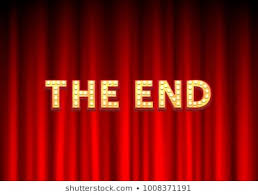